<center><h1><b>Hotels Reviews</b></h1></center>


<br>

<h3><b><i>Proyecto de Machine Learning - Análisis de Sentimiento y modelos de regresión</b></i></h3>

<br>




## Índice de Contenidos
<a id="indice"></a>


* [Planteamiento](#seccion-1)
* [Análsis exploratorio de datos](#seccion-2)
* [Comprensión de variables](#seccion-3)
* [Preprocesamiento de datos](#seccion-4)
  * [Reducción de features](#seccion-5)
  * [Eliminaciones, duplicados, anomalías y errores](#seccion-6)
  * [Missing values](#seccion-7)
  * [Outliers](#seccion-8)
* [Análisis de Sentimiento](#seccion-9)
* [Feature Engineering](#seccion-10)
  * [Transformaciones](#seccion-11)
  * [Nuevas features](#seccion-12)
  * [Escalados](#seccion-13)
* [División de los datos](#seccion-21)
* [Feature Reduction](#seccion-14)
* [Escoger métrica del modelo](#seccion-15)
* [Entrenamiento](#seccion-19)
  * [Entrenamiento con 7 variables](#seccion-16)
  * [Entrenamiento con 4 variables](#seccion-17)
  * [Entrenamiento con 4 variables Oversampling](#seccion-18)
  * [RandomForestRegressor](#seccion-22)
* [Resultados](#seccion-20)


## Planteamiento <a class="anchor" id="seccion-1"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

### ¿Qué necesidades presenta el negocio?

- _El Hotel quiere que analicemos el sentimiento de los `comentarios` que le van dejando sus clientes, para poder **predecir que valoración** (en `Nº de estrellas`) nos podrá poner en la web de TripAdvisor/hotels.com/booking.com, etc. Ya que en función a la nota media que tengamos, tendremos una mejor posicionamiento en el buscador y eso nos ayudará a tener mayor volumen de negocio._ 


- _Además, si podemos identificar patrones que nos pueda arrojar cierta información relevante, será útil para el departamento de marketing._

Esta es una lista de 1,000 hoteles y sus reseñas proporcionada por la base de datos comercial de **Datafiniti**, descargada desde la web de `data.world`. 

Estos datos cuentan con un total de 10000 registros. 

**_Las variables que tiene este dataset son:_**

- Id: identificador
- dateAdded: fecha en la que añadió la información al dataset.
- dateUpdated: última actualización de datos.
- address: dirección.
- catergories: categorias en la que se enmarca el hotel.
- primaryCatergories: principales servicios que ofrece.
- city: ciudad.
- country: país (USA).
- keys: parámetro de la URL que se utiliza para acceder a su sección particular.
- latitude y longitude: latitud y longitud.
- name: nombre del hotel
- postalCode: Código postal
- province: provincia (acrónimo)
- reviews.date: fecha de la review.
- reviews.dataSeen: fecha de la recolección de los datos en el conjunto de los mismos.
- `reviews.rating`: La valoración que aplica el usuario (esta será la variable target a predecir) 
- reviews.sourceURLs: URL donde viene la valoración realizada por el usuario.
- reviews.text: el comentario sobre la experiencia del usuario (la review propiamente dicha).
- reviews.title: el título del comentario
- reviews.userCity: ciudad a la que pertenece el usuario
- reviews.userProvince: provincia a la que pertenece el usuario
- reviews.username: seudonimo con el que se identifica el usuario
- sourceURLs: web del perfil del hotel en la plataforma de valoración.
- websites: website oficial del hotel.

#### **Síntesis del trabajo que se realizará:**

>Inicialmente se analizarán los datos y se tomará la decisión de enfocarlo como un problema de regresión lineal. Para poder predecir la variable target, se analizará el sentimiento de la varaible `reviews.text` y se usará ese dato como variable predictora para el modelo de regresión lineal. 

## Análsis exploratorio de datos <a class="anchor" id="seccion-2"></a>

[Volver al índice](#indice)

<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

- Comenzaremos con la importación de las librerías necesarias

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import missingno as mss
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

# Análisis de los textos
# ==============================================================================
from textblob import TextBlob
from wordcloud import WordCloud

# Preprocesado y modelado
# ==============================================================================
# from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats.stats import pearsonr, skew
from scipy.stats import shapiro
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import zipfile
# from sklearn.preprocessing import scale

# Configuración importación de funciones
# ==============================================================================
import sys
sys.path.append('./utils')

from functions import save_model, load_pipeline

# Importación de funciones
# ==============================================================================
from utils.functions import *

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración visualización de data
# ==============================================================================
pd.options.display.max_rows = 35
pd.options.display.max_columns = 35
pd.options.display.max_colwidth = 50

#### Importación del dataset

In [2]:
data = read_csv_from_zip('./data.zip', 'Datafiniti_Hotel_Reviews.csv')

`[OK]`   Encoding en datos. UTF-8.

`[OK]`   Dataframe completo.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

In [ ]:
pd.options.display.max_columns = 25
data.head()

In [ ]:
data_initial = data[["reviews.rating", 'wordCount', 'reviews.text_sentiment','reviews.text_polarity','reviews.text_subjectivity', 'reviews.title_sentiment','reviews.title_polarity','reviews.title_subjectivity','distance_to_city_center','Data.Totals.Violent.All']]

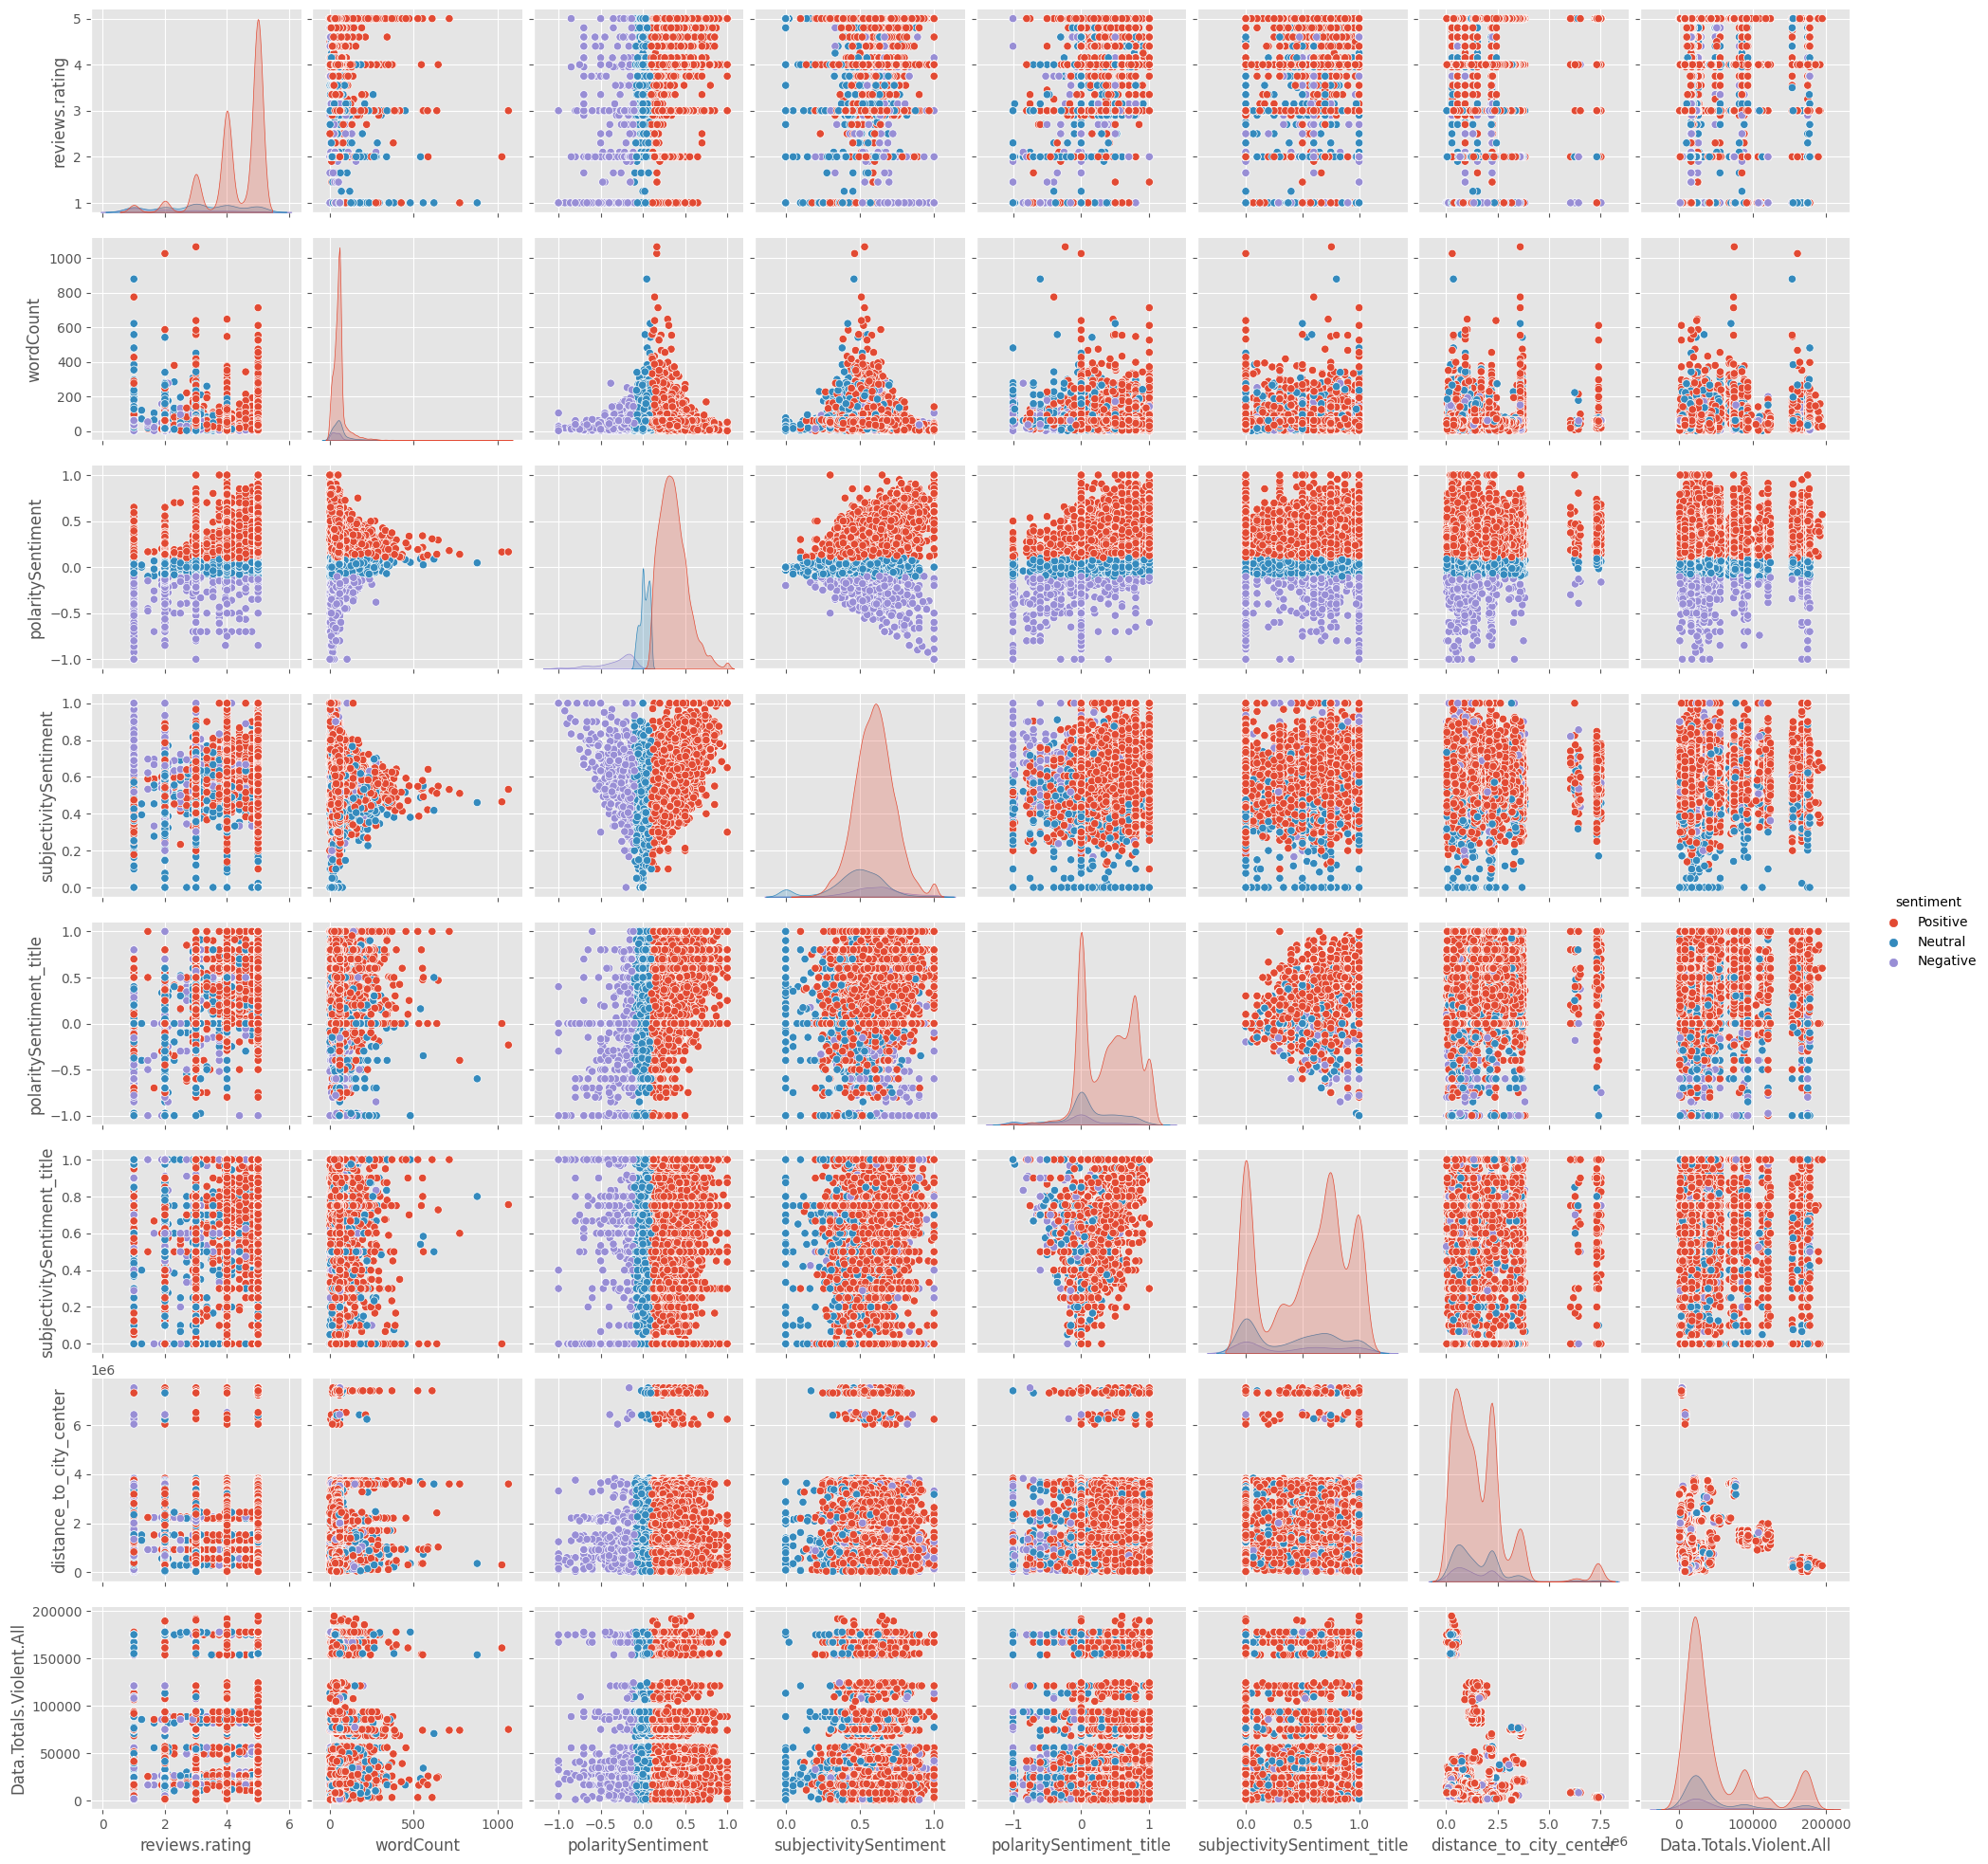

In [ ]:
sns.pairplot(data_initial, hue='sentiment');

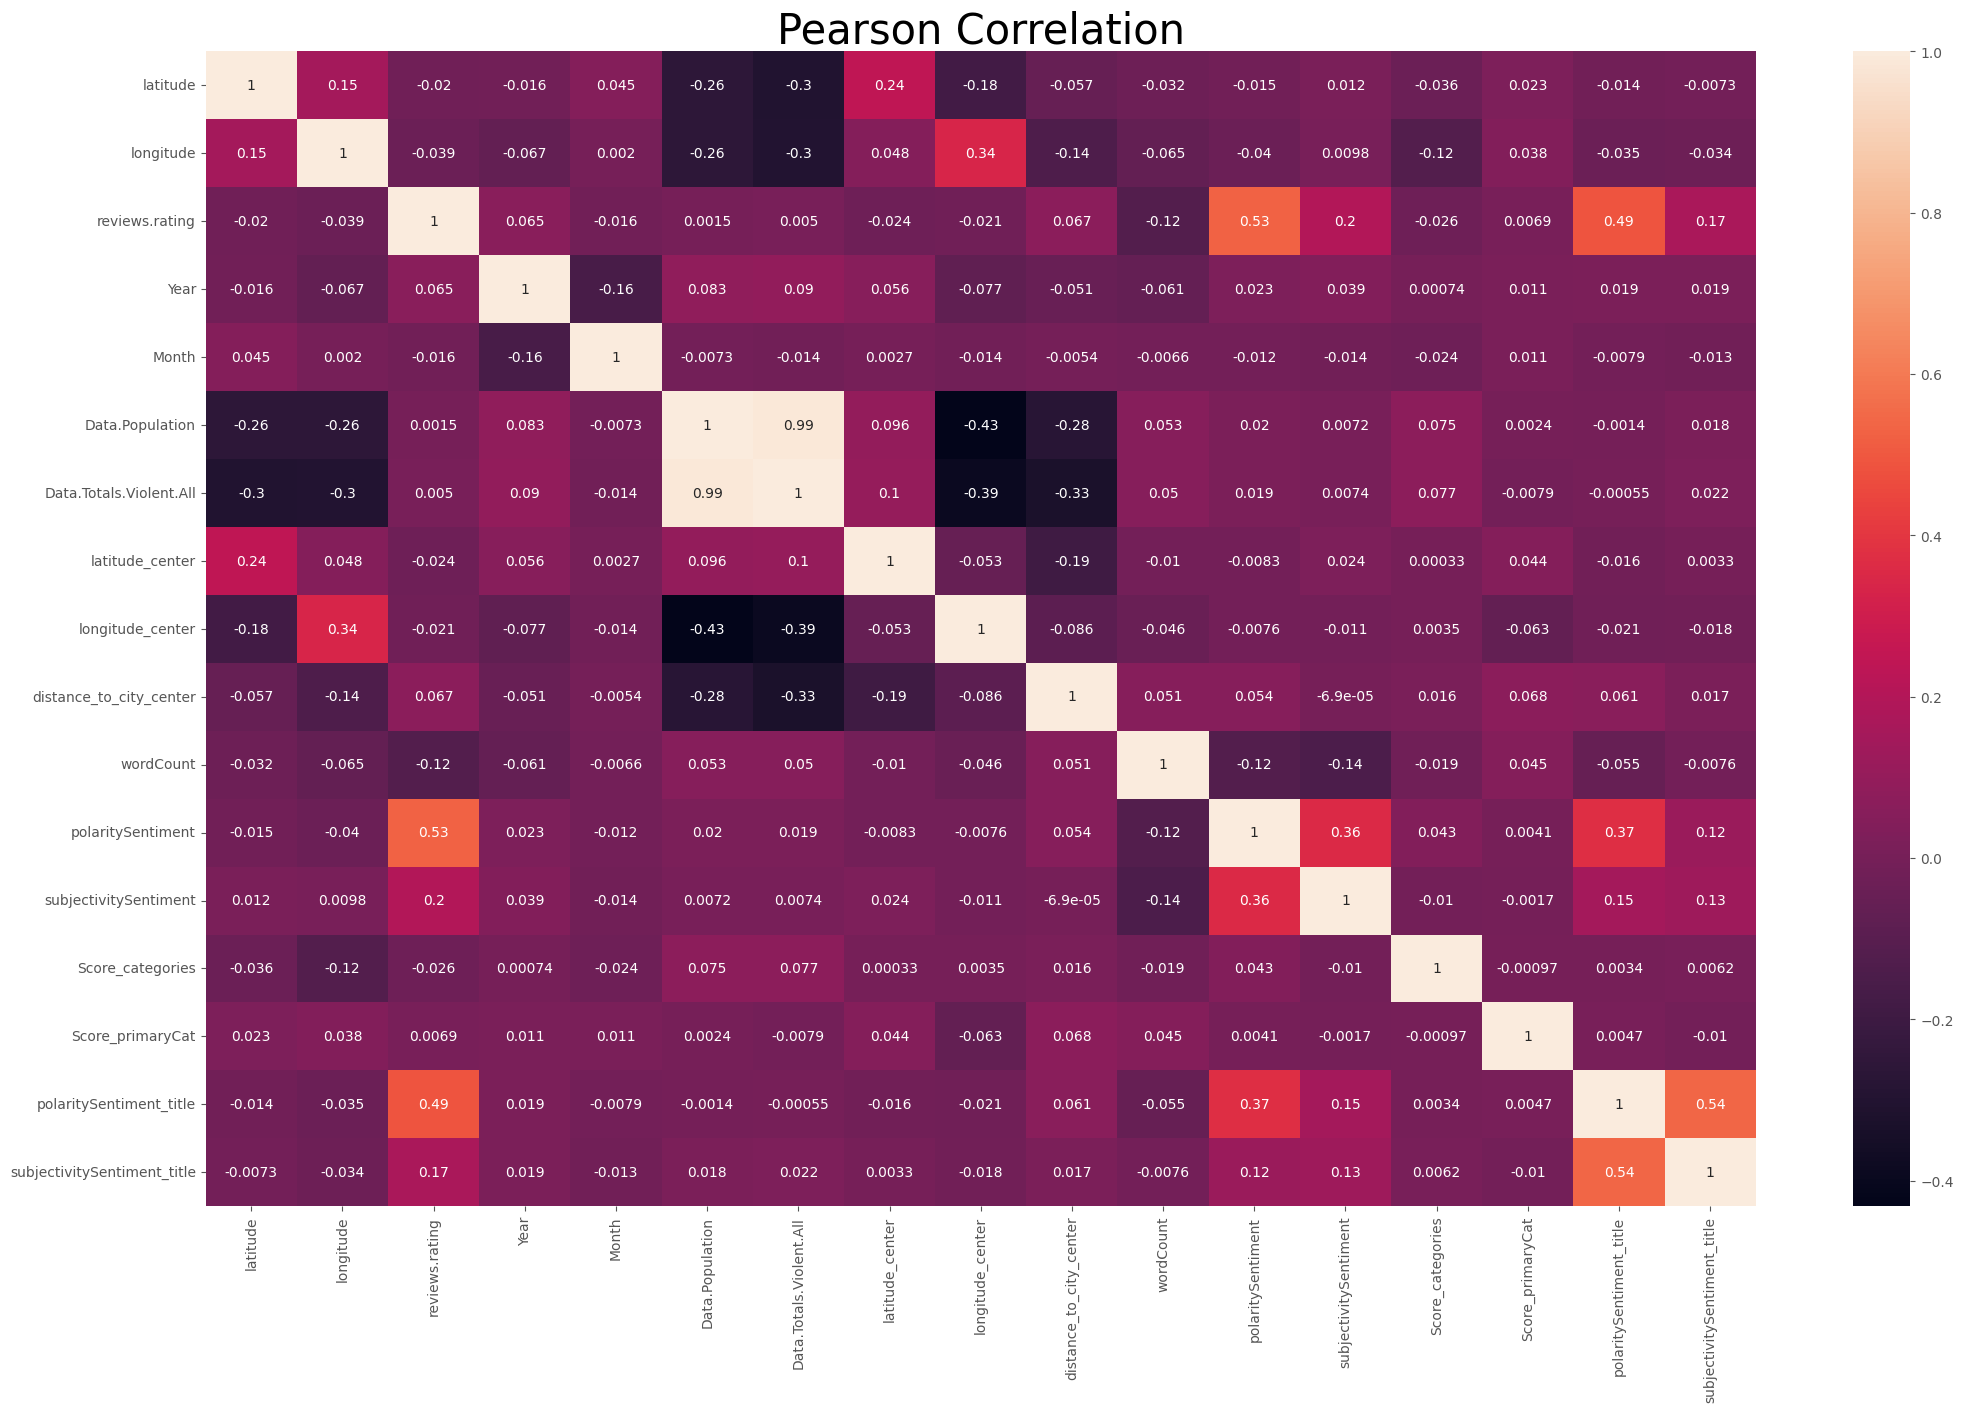

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot=True)
plt.title('Pearson Correlation', size=30);

In [222]:
df['name'].value_counts()

Metro Points Hotel-Washington North         202
The Westin Las Vegas Hotel & Spa            171
Best Western Springfield                    160
ARIA Resort Casino                          139
Kinzie Hotel                                138
                                           ... 
Days Inn Ames                                 1
Hampton Inn Orange City                       1
Hampton Inn & Suites Altoona-des Moines       1
Hilton Garden Inn Bettendorf/quad Cities      1
Drury Inn Suites Austin North                 1
Name: name, Length: 1670, dtype: int64

### **_¿Me vale el modelo para entrenar?_**

- _Volumen_: tiene un volumen suficientemente amplio para poder ser entrenado.
- _Calidad_: Los datos están completos, salvo algún que otro NaN, que trataremos más adelante.
- _Población_: Los datos son recogidos de diversas webs, como se puede apreciar en el dataset, por lo que no es un criterio unilateral que solo tiene en cuenta el punto de vista de una empresa que recoge los datos, sino de varias, lo que democratiza un poco más los comentarios recogidos. 
- _Fuentes externas_: Se ha recurrido a fuentes externas para poder intentar encontrar una correlación entre la variable a predecir con las predictoras. Si ayuda la dejaremos, sino, será eliminada. La fuente ha sido de una institución de regimen público, por lo que se espera que sigan actualizando dicha base de datos y se pueda contar con esta información más adelante para seguir nutriendo el modelo.
- _Creación de datos_: se explorará la posibilidad más adelante, de momento hemos creado algunas features y veremos que tal se comportan. Aún tenemos muchas cosas que analizar y crear, para poder ver el potencial del dataset.

## Compresión de variables <a class="anchor" id="seccion-3"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)





A continuación vamos a definir las características principales de nuestras variables:

- `dateAdded y dateUpdated`: Son variables que representan las fechas en las que se han añadido al dataset y se han actualizado, respectivamente. Son datos de caracter temporal, donde vienen fecha y hora, y `no se usarán` para el modelo de predicción.

- `address`: Corresponde a la dirección del hotel. Al ya analizar los datos de ubicación con latitudes y longitudes, considero que `esta información ya la recoge las otras varaibles` dichas, por lo carece de valor de cara a la predicción.
- `Categories y primaryCategories`: Estas variables a priori son de caracter identificadoras, que lo que hace es clasificar que tipo de servicios da el hotel y en qué subgrupo servicios hoteleros se encuentra. A priori, no parece ser relevante, pero analizaremos a continuación si podemos tratarlo como `dato cualitativo ordinal`, donde le demos una mayor ponderancia a los hoteles que mayores servicios ofrezcan, ya que pueden ser más atractivos a un mayor número de público, quizás podamos encontrar alguna relación en ese sentido.
- `city`, `country`, `keys` y `name`: tanto city como country son datos redundantes, que ya se conocen por las ubicaciones a través de coordenadas. Al no aportar nada, se van a descartar, al igual que keys, que es un identificador de una dirección web, y name, que es el nombre del hotel y que tampoco tiene mayor trascendencia, por lo que tampoco será gran ayuda de cara a la predicción.
- `postalCode`: No se ha puede considerar como número, ya que algunos datos llevan un guión medio o separador, que evita que se los pueda considerar como otra cosa que no sea un object o string. Debido a que ya tenemos la ubicación exacta por lat. y long. tanto del hotel como del centro de la ciudad y la distancia entre los puntos, no vamos a necesitar de este dato. 
- `province`: es importante, ya que es gracias a ella que podemos hacer un merge con las variables externas. Nos sirve para ubicar en el mapa en que provincia se encuentran cada hotel. Se trata de un dato `cualitativo nominal`, ya que no hay una relación natural entre ellas.
- `reviews.date`, `reviews.dateSeen`, `Year`, `Month`: En _reviews.date_ presenta la fecha del comentario, del cual, tras trabajar en la feature, se sacará como feature nueva _Month_ y _Year_, esta última servirá también para poder hacer merge con las columnas de datos exteriores. Son variables que se crean con esa finalidad, se intentará sacar algún provecho, pero a priori, ya han cumplido su cometido. revies.dateSeen es la fecha de la visualización. Realmente no tiene mayor trascendencia y no la usaremos para nuestro modelo.
- `reviews.rating`: Es nuestra variable target. Representa una tipo de dato cuantitativo continuo, y lo que se puede apreciar es que es un promedio de más de una valoración, en la cual testea los servicios prestados por el hotel. No presenta una distribución normal, por lo que habrá que realizarle una transformación logarítmica.
- `reviews.surceURLs`, `reviews.username`: Son variables que hacen referencia a la URL que direcciona a la valoración en la web y el seudónimo que ha utilizado el usuario que ha escrito la review. Son variables de tipo identificadoras, las cuales son nombres únicos, no aportan valor al modelo de predicción por lo que no se tendrán en cuenta.
- `reviews.text`, `reviews.title`, `clean_text`, `wordCount`: de _reviews.text_ y _reviews.title_ sacaremos nuestro análisis de sentimiento, el cual será uno de los inputs para el modelo. *clean_text* es una feature de proceso intermedio para poder analizar el sentimiento del mismo, una vez eliminado el ruido que podría tener el comentario (signos de puntuación, números, etc.) y _wordCount_ corresponde al conteo de las palabras, ya que guarda una pequeña relación entre el número de palabras que le dedica el usuario a la redacción con la nota final que acaba poniendo. 
- `reviews.userCity` y `reviews.userProvince`: Son las columnas con más del 58 y 72 % de datos missings respectivamente. Se toma la decisión de prescindir de estas features. Tampoco habrían tenido mayor relevancia para el modelo. 
- `sourceURLs`: a priori es una variable que como indica su nombre, solo te muestra la URL hacia la web donde está la valoración, sin embargo, se aplicarán técnicas de Expresiones Regulares, para poder extrar la web de cada review y ver si hay alguna relación que pueda interesarnos de cara al modelo de predicción.
- `website`: es la página web del hotel. Otro dato identificativo de nombres únicos y que tampoco tiene mayor trascendencia, por lo que tampoco será gran ayuda de cara a la predicción.
- `population`, `totals_crimes`: Son las features creadas a partir de datos externos. Son datos `cuantitativos discretos`, que indican el Nº de población de la ciudad en la que se encuentra el hotel y la cantidad total de crimenes en todas sus variantes, en el periodo de tiempo en el que se recogieron las reviews.
- `latitude_center`, `longitude_center`, `latitude`, `longitude`, `distance_to_city_center`: Tanto LAT como LONG _center_ hace refencia a el punto centrico de la ciudad en la que se encuentra el hotel, y LAT y LONG a secas, es la ubicación del hotel. A partir de estos datos, se obtiene la distancia del hotel al centro de la ciudad, medida en metros, y se usará como input para nuestro modelo. Son datos Cuantitativos Continuos.
- `reviews.text_sentiment`, `reviews.text_polarity`, `reviews.text_subjectivity`: Estas variables son las que he extraido del análisis de sentimiento realizado a reviews.text. `reviews.text_sentiment` Es la variable que recoge el resultado positivo/negativo/neutral del texto. Se basa en los valores de las otras dos variables, `reviews.text_polarity` y `reviews.text_subjectivity`, siendo la primera, la polaridad del mensaje (sus valores van de -1 a 1, siendo un número negativo un sentimiento negativo, 0 neutral y un número positivo sería una review positiva), y por último `reviews.text_subjectivity` hace referencia a la subjetividad del mensaje, fluctuando entre 0 y 1, siendo 0 totalmente objetivo, y 1 totalmente subjetivo. Variables útiles que usaremos para el modelo de predicción. Son ´.
- `categories_unique`, `Score_categories`, `Score_primaryCat`: Son variables creadas de un preprocesamiento de las columnas 'catergories' y primaryCatergories', siendo `categories_unique` una columna en la que se limpia el texto y se dejan solo los servicios que prestan el hotel sin repeticiones, y las dos últimas corresponden a un valor proporcionado en base a las palabras claves que se repiten en catergories, y que da una mayor relevancia a los hoteles que más servicios ofrencen, ya que son más susceptibles de ser valorados.  son variables `cuantitativas discretas`.

## Reporte de variables:

In [4]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(data)

COL_N              id dateAdded dateUpdated address categories  \
DATA_TYPE      object    object      object  object     object   
MISSINGS (%)      0.0       0.0         0.0     0.0        0.0   
UNIQUE_VALUES    1853      1788        1632    1846       1148   
CARDIN (%)      18.53     17.88       16.32   18.46      11.48   

COL_N         primaryCategories    city country    keys latitude longitude  \
DATA_TYPE                object  object  object  object  float64   float64   
MISSINGS (%)                0.0     0.0     0.0     0.0      0.0       0.0   
UNIQUE_VALUES                 6    1021       1    1853     1849      1850   
CARDIN (%)                 0.06   10.21    0.01   18.53    18.49      18.5   

COL_N            name postalCode province reviews.date reviews.dateSeen  \
DATA_TYPE      object     object   object       object           object   
MISSINGS (%)      0.0        0.0      0.0          0.0              0.0   
UNIQUE_VALUES    1670       1474       49         3188             2053   
CARDIN (%)       16.7      14.74     0.49        31.88            20.53   

COL_N         reviews.rating reviews.sourceURLs reviews.text reviews.title  \
DATA_TYPE            float64             object       object        object   
MISSINGS (%)             0.0                0.0         0.01          0.01   
UNIQUE_VALUES             30               6386         9981          8622   
CARDIN (%)               0.3              63.86        99.81         86.22   

COL_N         reviews.userCity reviews.userProvince reviews.username  \
DATA_TYPE               object               object           object   
MISSINGS (%)             58.36                72.95              0.0   
UNIQUE_VALUES             2051                  177             6942   
CARDIN (%)               20.51                 1.77            69.42   

COL_N         sourceURLs websites  
DATA_TYPE         object   object  
MISSINGS (%)         0.0      0.0  
UNIQUE_VALUES       1853     1746  
CARDIN (%)         18.53    17.46

## Preprocesamiento de datos <a class="anchor" id="seccion-4"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)



## Reducción de features <a class="anchor" id="seccion-5"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)



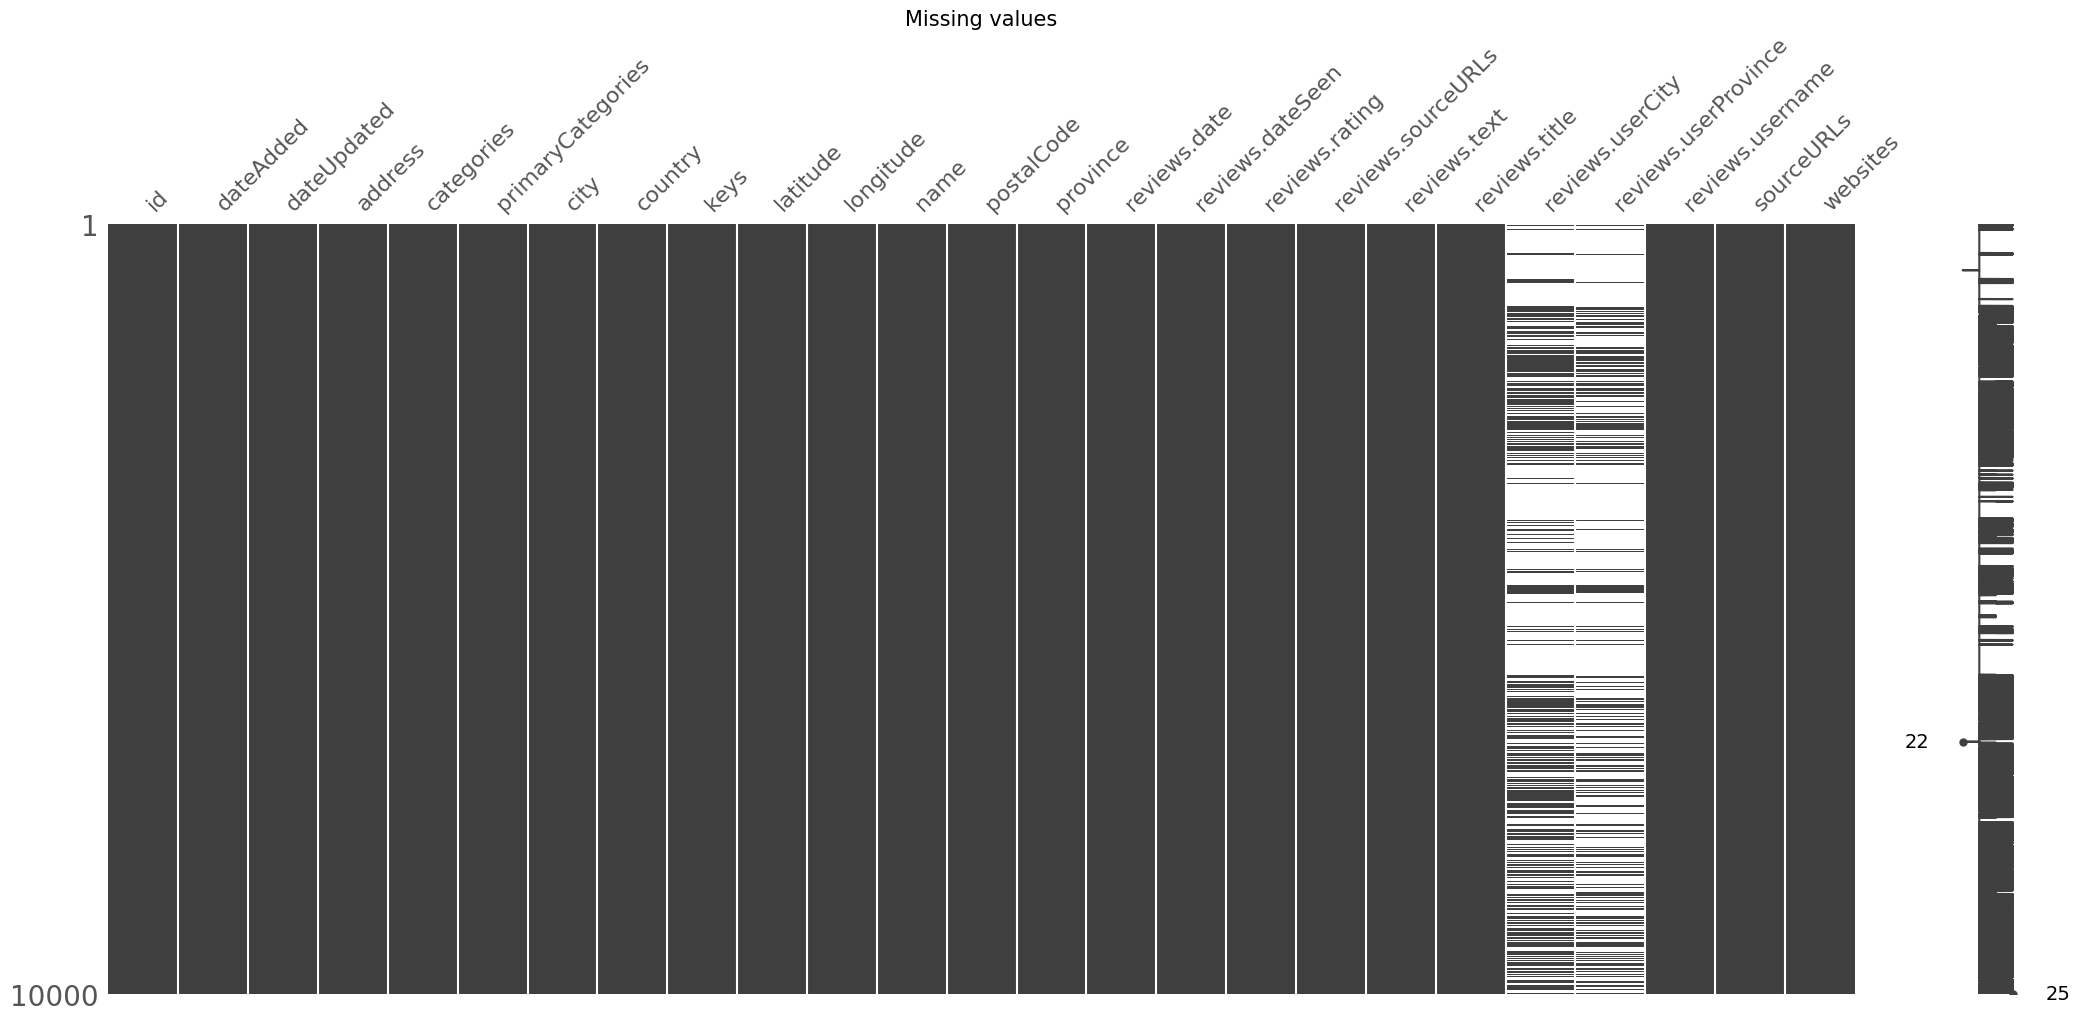

In [5]:
mss.matrix(data);
plt.title('Missing values', size=15);


In [6]:
print('Valores nulos en data, (%)','\n')
print(data[['reviews.userCity','reviews.userProvince']].isna().sum()/data.shape[0]*100)


Valores nulos en data, (%) 

reviews.userCity        58.36
reviews.userProvince    72.95
dtype: float64


`reviews.UserCity` y `reviews.UserProvince` son las variables que a priori presentan **missing values**, procedemos a filtrar estos datos de cara a nuestro modelo. 

In [7]:
df = del_null_features(data)

In [8]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'websites'],
      dtype='object')

## Eliminaciones, duplicados, anomalías y errores <a class="anchor" id="seccion-6"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

Se han eliminado varios datos duplicados, que se han explicado en la comprensión de las variables.

## Missing values <a class="anchor" id="seccion-7"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

Ya hemos tratado las primeras features anteriormente, filtrandolas por falta de información relevante para el modelo. Aún nos quedan algunos missing por tratar:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   dateAdded           10000 non-null  object 
 2   dateUpdated         10000 non-null  object 
 3   address             10000 non-null  object 
 4   categories          10000 non-null  object 
 5   primaryCategories   10000 non-null  object 
 6   city                10000 non-null  object 
 7   country             10000 non-null  object 
 8   keys                10000 non-null  object 
 9   latitude            10000 non-null  float64
 10  longitude           10000 non-null  float64
 11  name                10000 non-null  object 
 12  postalCode          10000 non-null  object 
 13  province            10000 non-null  object 
 14  reviews.date        10000 non-null  object 
 15  reviews.dateSeen    10000 non-null  object 
 16  revie

- La manera que manejaremos los datos nulos en los comentarios o títulos, será rellenarlos con un valor de `"without text"` para que el resultado del análisis de sentimiento sea **neutro** y no afecte ni positiva ni negativamente. 

In [10]:
df = fill_reviews_text_nulls(df)

## Outliers <a class="anchor" id="seccion-8"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

Vamos a analizar algunas variables que consideramos importantes de cara al modelo, y vamos a trabajar en reducir sus outliers.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   dateAdded           10000 non-null  object 
 2   dateUpdated         10000 non-null  object 
 3   address             10000 non-null  object 
 4   categories          10000 non-null  object 
 5   primaryCategories   10000 non-null  object 
 6   city                10000 non-null  object 
 7   country             10000 non-null  object 
 8   keys                10000 non-null  object 
 9   latitude            10000 non-null  float64
 10  longitude           10000 non-null  float64
 11  name                10000 non-null  object 
 12  postalCode          10000 non-null  object 
 13  province            10000 non-null  object 
 14  reviews.date        10000 non-null  object 
 15  reviews.dateSeen    10000 non-null  object 
 16  revie

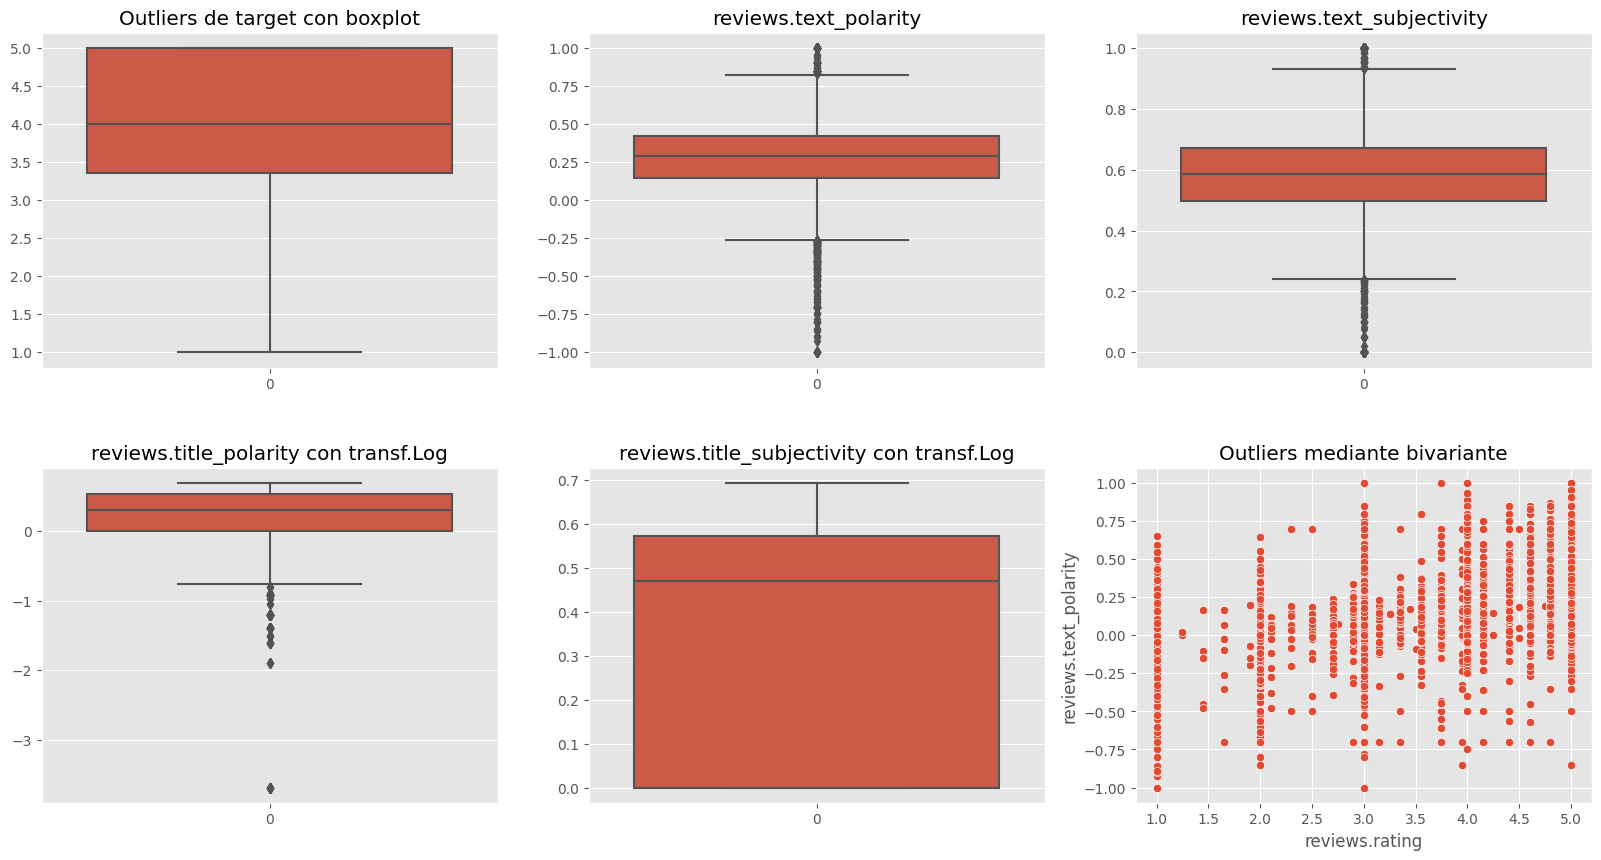

In [19]:
# Target de reviews.rating en data.an
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

# Outliers con boxplot
sns.boxplot(df['reviews.rating'], ax=axes[0, 0])
axes[0, 0].set_title("Outliers de target con boxplot")

# Feature susceptible de transformación
sns.boxplot(df['reviews.text_polarity'], ax=axes[0, 1])
axes[0, 1].set_title("reviews.text_polarity")

# Feature susceptible de transformación
sns.boxplot(df['reviews.text_subjectivity'], ax=axes[0, 2])
axes[0, 2].set_title("reviews.text_subjectivity")

# Transformacion logaritmica
sns.boxplot(np.log1p(df['reviews.title_polarity']), ax=axes[1, 0])
axes[1, 0].set_title("reviews.title_polarity con transf.Log")

# Transformacion logaritmica
sns.boxplot(np.log1p(df['reviews.title_subjectivity']), ax=axes[1, 1])
axes[1, 1].set_title("reviews.title_subjectivity con transf.Log")

# Outliers mediante bivariante
sns.scatterplot(data=df, x='reviews.rating', y='reviews.text_polarity', ax=axes[1, 2])
axes[1, 2].set_title("Outliers mediante bivariante");

In [219]:
outliers_polarity = df.loc[df['reviews.text_polarity'] >= 0.8, ['reviews.rating','reviews.text_polarity','reviews.text_subjectivity','Year','Month']]

In [ ]:
outliers_polarity.groupby('Year')['reviews.rating'].count()


Year
2006     1
2007     2
2008     1
2009     1
2010     3
2011     3
2012     5
2013    12
2014    12
2015    37
2016    51
2017    14
2018     7
Name: reviews.rating, dtype: int64

In [ ]:
outliers_polarity.groupby('Year')['reviews.rating'].count().cumsum()

Year
2006      1
2007      3
2008      4
2009      5
2010      8
2011     11
2012     16
2013     28
2014     40
2015     77
2016    128
2017    142
2018    149
Name: reviews.rating, dtype: int64

In [ ]:
data.groupby('Year')['reviews.rating'].count()


Year
2002       1
2003       2
2004       6
2005      16
2006      16
2007      82
2008      81
2009     102
2010      87
2011     157
2012     193
2013     396
2014     683
2015    2737
2016    4131
2017    1000
2018     310
Name: reviews.rating, dtype: int64

In [ ]:
outliers_polarity_inf = data.loc[data.polaritySentiment <= -0.26, ['reviews.rating','polaritySentiment','subjectivitySentiment','Year','Month']]


In [ ]:
outliers_polarity_inf.groupby('Year')['reviews.rating'].count()


Year
2006     1
2008     2
2009     3
2010     2
2011     3
2012     1
2013     5
2014    22
2015    65
2016    93
2017    42
2018     4
Name: reviews.rating, dtype: int64

In [ ]:
outliers_polarity_inf.groupby('Year')['reviews.rating'].count().cumsum()


Year
2006      1
2008      3
2009      6
2010      8
2011     11
2012     12
2013     17
2014     39
2015    104
2016    197
2017    239
2018    243
Name: reviews.rating, dtype: int64

In [ ]:
data.groupby('Year')['reviews.rating'].count()


Year
2002       1
2003       2
2004       6
2005      16
2006      16
2007      82
2008      81
2009     102
2010      87
2011     157
2012     193
2013     396
2014     683
2015    2737
2016    4131
2017    1000
2018     310
Name: reviews.rating, dtype: int64

#### **Valoraciones:**

- Según se ve en la gráfica boxplot de `reviews.text_polarity`, se aprecian algunos outliers que intentamos ver como tratar.
- Analizando los datos, los outliers por la parte **superior** rondan los 150 reviews de un total de 10000. Supone un `1.5%` 
- los outliers por la parte **inferior** rondan los 243 reviews de un total de 10000. Supone un `2.43%` 
- Los años más afectados son del 2014 al 2017 inclusive.

Si decidimos tratar estos datos, para mejorar la predicción, supondría una decisión sobre un total de un `4%` de los datos.
Si decidimos tratar los datos solo en la franja de los años más afectados, supondría una decisión sobre un total de un `3.33%` de los datos totales, lo que supondría dejar unos outliers que supondrían un `0.67%` de los datos totales, bastante asumible de cara al modelo de predicción.

`Antecedentes`:

El objetivo de la empresa con este estudio es aumentar su volumen de negocio.

Está comprobado que si mejoramos nuestras valoraciones en las diversas plataformas donde tenemos presencia, nuestro posicionamiento en los buscadores de dichas plataformas mejorará, y esto hará que también mejoren nuestras posiciones en buscadores generales. 

Entonces, el objetivo que subyace debajo de esto es maximizar las valoraciones, siendo efectivamente, nuestro target = `reviews.rating`.

Hasta ahora, hemos visto que hay ciertas features que tienen una relación alta con la target (correlación considerable) y una de ellas es la que en cuestión estamos analizando, `reviews.text_polarity`.

Antes de tomar una decisión, es importante investigar las causas detrás de los outliers. _¿Es posible que los valores sean válidos y representativos de los datos, o son errores o valores anómalos?_ Si los outliers son valores legítimos, puede ser necesario conservarlos para tener una representación precisa de los datos.

> _(En caso de comprobar que son anómalos, podría optar por eliminarlos, imputación de valores, transformaciones, tratamiento por separado, etc... ó... No hacer nada, dado que solo suponen un un 4%. Hay modelos como Regresión robusta de M-estimadores, Regresión de Quantile, Regresión Huber, entre otros, según mi investigación.) Como apriori no son modelos con los que hemos trabajado, voy a tenerlo en cuenta, pero intentaremos predecir con lo ya conocido._

Los valores apriori no parecen ser anómalos, por lo que se decide mantenerlos porque pueden ser representativos de la realidad. 

Anteriormente, cuando estaba analizando `Year` he encontrado una apreciación que quiero recuperar en este momento:

    - Aquí vemos algo interesante, desde 2008 hasta 2015 (salvando 2011, que por poco, ha superado las 4 estrellas) de media, no han podido subir a la categoría de 4 estrellas en reviews. Sin embargo, los últimos años han conseguido mejorar esa marca y desde 2016 hasta 2018, están por encima de los 4.10 estrellas.

Teniendo en cuenta todo lo anterior, se llegan a las siguientes conclusiones y decisiones:

- Durante la franja de 2014 a 2017 son los periodos que coinciden con mayores reviews, por lo que cualquier cambio quedará diluido entre el total de las reviews. 
- He notado que la tendencia de las valoraciones es positiva y creciente, gracias al `scatterplot bivariante` entre la target y la variable en cuestión, y que además, los cambios afectarían en esa dirección, por lo que estaríamos respetando la tendencia natural de los datos.

**Por todo ello, decido que voy a imputar a los outliers en los datos de `reviews.text_polarity` solo para los años más afectados (2014-2017), y estimo que es la mejor opción en este caso para mejorar la precisión del modelo y cumplir con el objetivo de la empresa de maximizar su volumen de negocio.**

La manera de hacerlo es ajustandolo a sus a las franjas inferior y superior de los cuartiles 1 y 3 (rango intercuartil).

In [ ]:
data['polaritySentiment'].describe()

count    10000.000000
mean         0.275113
std          0.239677
min         -1.000000
25%          0.146736
50%          0.292593
75%          0.420000
max          1.000000
Name: polaritySentiment, dtype: float64

- Rango intercuartílico (IQR). Los outliers se encuentran fuera de los límites establecidos por el cuartil superior (Q3) + 1.5 * IQR y el cuartil inferior (Q1) - 1.5 * IQR.
- Calculo de los limites de los cuartiles:
    
    Q1 - 1.5 * IQR = 0.146736 - 1.5 * (0.420000 - 0.146736) = -0.300874
    
    Q3 + 1.5 * IQR = 0.420000 + 1.5 * (0.420000 - 0.146736) = 0.646736


In [ ]:
df = corregir_outliers(df, 2014, 2017, 'reviews.text_polarity')

In [ ]:
df = corregir_outliers(df, 2014, 2017, 'reviews.text_subjectivity')


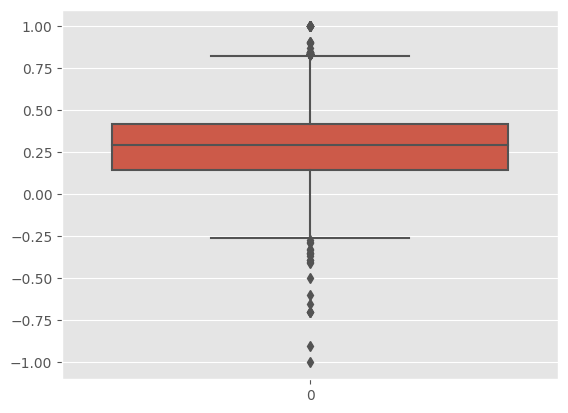

In [ ]:
sns.boxplot(df['reviews.text_polarity']);


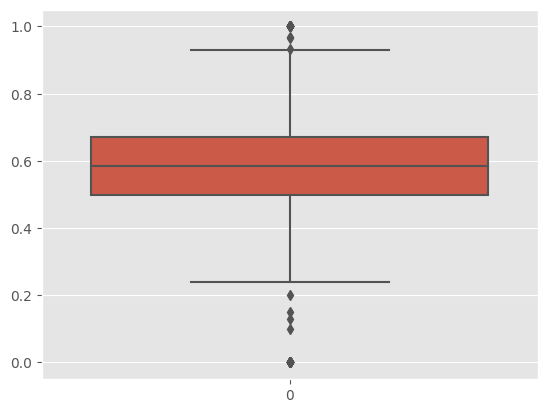

In [ ]:
sns.boxplot(df['reviews.text_subjectivity']);


ahora solo se tiene un `0,67%` de outlier!! está listo para ir al modelo.

**Un análisis profundo y de conocimiento de negocio ha sido realizado!**


- Como podemos comprobar, a `reviews.title_subjectivity` y `reviews.title_polarity` no hace falta tratar los outliers.

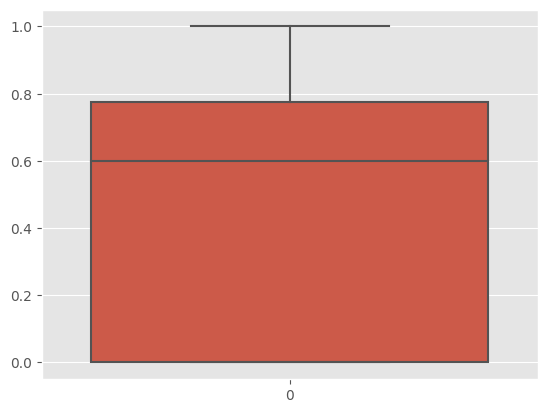

In [ ]:
sns.boxplot(df['reviews.title_subjectivity']);

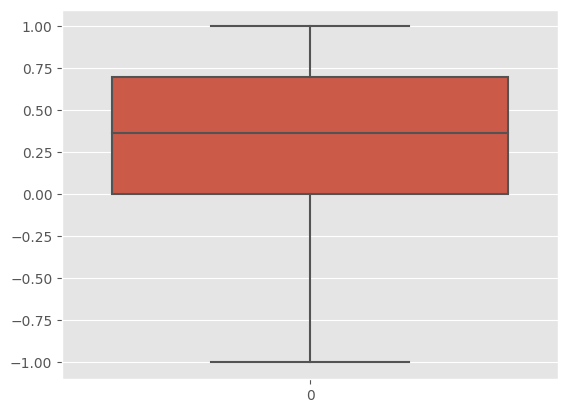

In [ ]:
sns.boxplot(df['reviews.title_polarity']);


## Análisis de Sentimiento <a class="anchor" id="seccion-9"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

El contenido de la sección 1.

In [12]:
df['reviews.rating'].value_counts()

5.00    4384
4.00    2397
3.00    1187
1.00     572
2.00     561
4.80     162
4.60     155
4.40     102
3.75      91
4.15      78
3.95      52
3.55      50
3.35      40
3.15      37
2.90      34
2.70      23
2.50      19
2.30      12
2.10      11
1.65       8
1.45       6
1.90       4
4.50       4
3.50       2
4.25       2
1.25       2
3.25       2
2.75       1
3.45       1
4.75       1
Name: reviews.rating, dtype: int64

- Vemos que la columna `target` no dispone de valoraciones enteras de 1 al 5, sino que previsiblemente parece ser el resultado de más de una valoración. 

In [221]:
df['reviews.text'][9998]

'My stay here was what I expected. The staff is friendly enough, and the hotel is pretty clean. The parking can be tricky because when I arrived after 6p, it seemed to be pretty full. If you do not have Diamond level status, then you may have to park far away from an entrance/exit. A plus, though, is that there... More'

In [14]:
df["reviews.text"] = df["reviews.text"].astype(str)


- Realizamos los cálculos de polaridad y subjetividad.

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
df = sentiment_analysis_full(df, 'reviews.text')


In [16]:
df = sentiment_analysis_full(df, 'reviews.title')


In [17]:
df.loc[:, ["reviews.rating", "reviews.text", 'reviews.text_clean', 'wordCount', 'reviews.text_sentiment','reviews.text_polarity','reviews.text_subjectivity']]


reviews.rating                                       reviews.text  \
0                5.0  Our experience at Rancho Valencia was absolute...   
1                5.0  Amazing place. Everyone was extremely warm and...   
2                5.0  We booked a 3 night stay at Rancho Valencia to...   
3                2.0  Currently in bed writing this for the past hr ...   
4                5.0  I live in Md and the Aloft is my Home away fro...   
...              ...                                                ...   
9995             3.0  It is hard for me to review an oceanfront hote...   
9996             4.0  I live close by, and needed to stay somewhere ...   
9997             4.0  Rolled in 11:30 laid out heads down woke up to...   
9998             1.0  Absolutely terrible..I was told I was being gi...   
9999             1.0  Filthy, outdated, noisy neighbours, but this w...   

                                     reviews.text_clean  wordCount  \
0     our experience at rancho valencia was absolute...          4   
1     amazing place everyone was extremely warm and ...          3   
2     we booked a  night stay at rancho valencia to ...          4   
3     currently in bed writing this for the past hr ...          6   
4     i live in md and the aloft is my home away fro...          3   
...                                                 ...        ...   
9995  it is hard for me to review an oceanfront hote...          4   
9996  i live close by and needed to stay somewhere f...          4   
9997  rolled in  laid out heads down woke up to cont...          2   
9998  absolutely terriblei was told i was being give...          1   
9999  filthy outdated noisy neighbours but this was ...          1   

     reviews.text_sentiment  reviews.text_polarity  reviews.text_subjectivity  
0                  Positive               0.589286                   0.642857  
1                  Positive               0.375000                   0.531250  
2                  Positive               0.488889                   0.538889  
3                  Negative              -0.125000                   0.325000  
4                  Positive               0.284787                   0.531633  
...                     ...                    ...                        ...  
9995               Positive               0.179500                   0.574167  
9996               Positive               0.281639                   0.537121  
9997               Positive               0.382063                   0.755556  
9998                Neutral               0.080000                   0.400000  
9999               Negative              -0.325000                   0.566667  

[10000 rows x 7 columns]

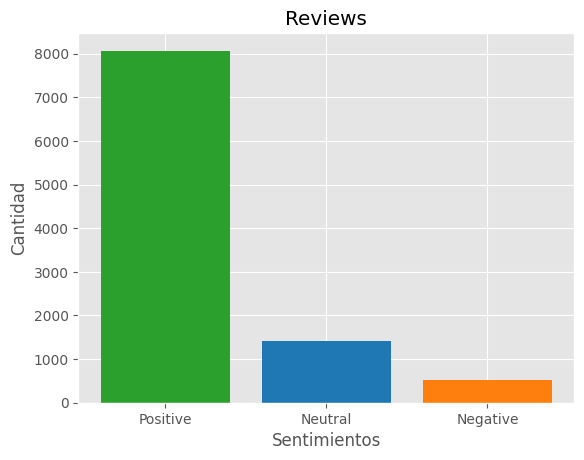

In [228]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
color_dict = {'Positive': colors[2], 'Negative': colors[1], 'Neutral': colors[0]}
counts = df['reviews.text_sentiment'].value_counts()
plt.bar(counts.index, counts.values, color=[color_dict[x] for x in counts.index])
plt.title('Reviews')
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad')
plt.show();

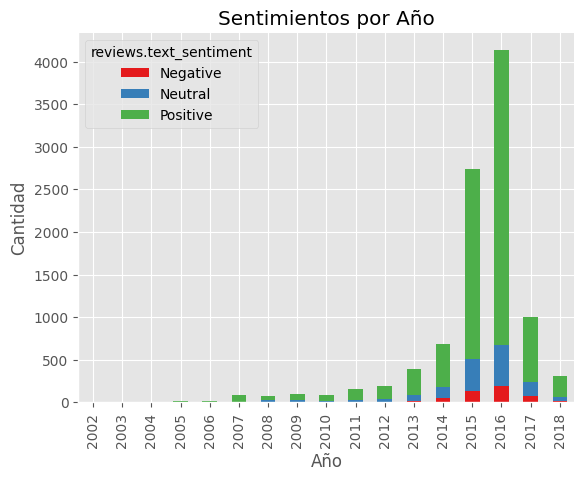

In [229]:
counts = df.groupby(['Year', 'reviews.text_sentiment'])['reviews.text_sentiment'].count().unstack(fill_value=0)


sns.set_palette("Set1")
ax = counts.plot(kind='bar', stacked=True)
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.set_title('Sentimientos por Año')
sns.despine()
plt.show()

In [230]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'websites', 'reviews.text_clean',
       'reviews.text_sentiment', 'wordCount', 'reviews.text_polarity',
       'reviews.text_subjectivity', 'reviews.title_clean',
       'reviews.title_sentiment', 'reviews.title_polarity',
       'reviews.title_subjectivity', 'reviews.rating_binned', 'Year', 'Month',
       'categories_unique', 'Score_categories', 'Score_primaryCat',
       'population', 'totals_crimes', 'latitude_center', 'longitude_center',
       'distance_to_city_center', 'websites_ratings'],
      dtype='object')

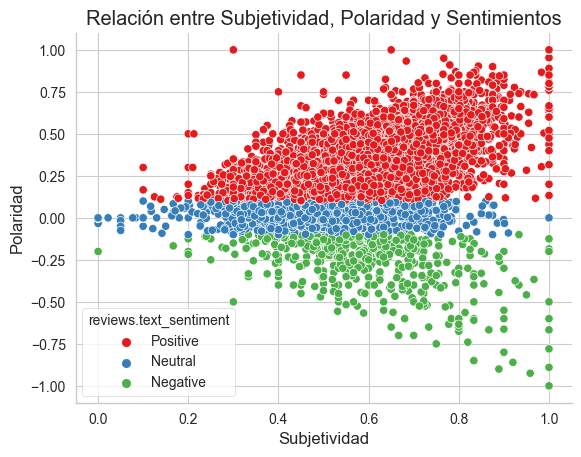

In [231]:
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='reviews.text_subjectivity', y='reviews.text_polarity', hue='reviews.text_sentiment', palette='Set1')
plt.title('Relación entre Subjetividad, Polaridad y Sentimientos')
plt.xlabel('Subjetividad')
plt.ylabel('Polaridad')
sns.despine()
plt.show();

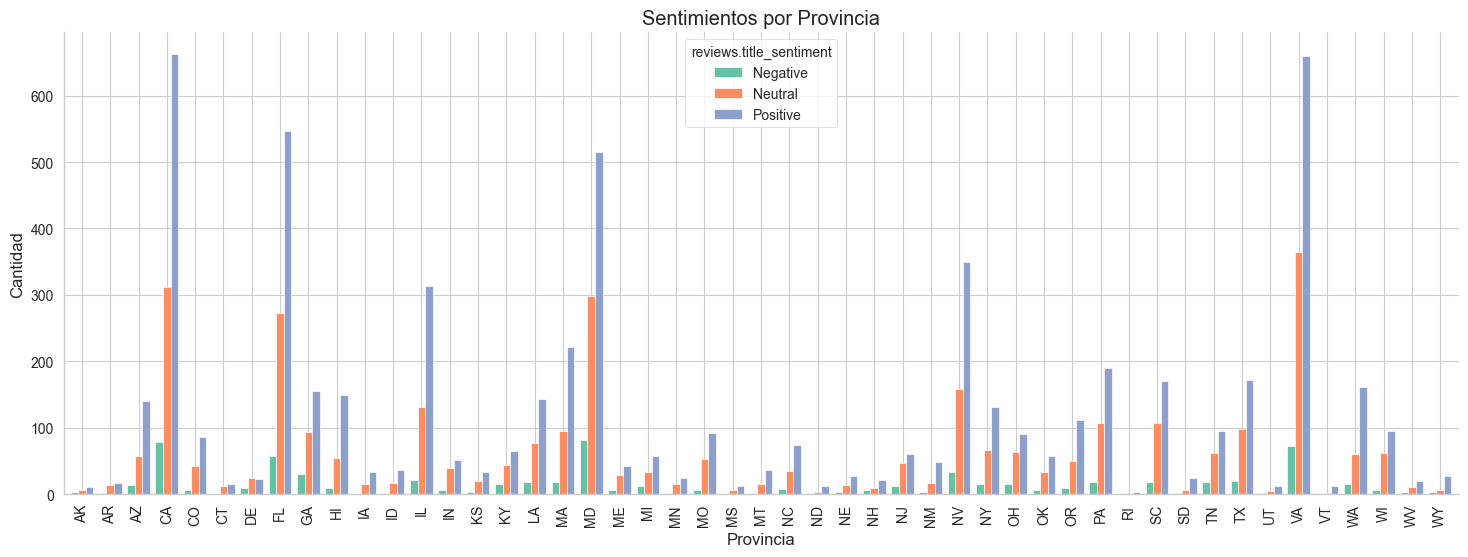

In [243]:
counts = df.groupby(['province', 'reviews.title_sentiment'])['reviews.title_sentiment'].count().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(18, 6))

# Creamos un gráfico de barras agrupado con Seaborn
sns.set_palette("Set2")
counts.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad')
ax.set_title('Sentimientos por Provincia')
sns.despine()

plt.show();

In [247]:
df[['reviews.text_polarity', 'reviews.text_subjectivity', 'wordCount', 'reviews.rating_binned' ]].describe()

reviews.text_polarity  reviews.text_subjectivity     wordCount  \
count           10000.000000               10000.000000  10000.000000   
mean                0.275113                   0.581374      4.262800   
std                 0.239677                   0.149796      2.679525   
min                -1.000000                   0.000000      0.000000   
25%                 0.146736                   0.497750      2.000000   
50%                 0.292593                   0.586181      4.000000   
75%                 0.420000                   0.670844      6.000000   
max                 1.000000                   1.000000     23.000000   

       reviews.rating_binned  
count            10000.00000  
mean                 4.04300  
std                  1.16777  
min                  1.00000  
25%                  3.00000  
50%                  4.00000  
75%                  5.00000  
max                  5.00000

In [245]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'websites', 'reviews.text_clean',
       'reviews.text_sentiment', 'wordCount', 'reviews.text_polarity',
       'reviews.text_subjectivity', 'reviews.title_clean',
       'reviews.title_sentiment', 'reviews.title_polarity',
       'reviews.title_subjectivity', 'reviews.rating_binned', 'Year', 'Month',
       'categories_unique', 'Score_categories', 'Score_primaryCat',
       'population', 'totals_crimes', 'latitude_center', 'longitude_center',
       'distance_to_city_center', 'websites_ratings'],
      dtype='object')

**Vemos algo curioso en estos datos:**

- Vemos que frente a `8068 reviews positivas`, solo disponemos de `6120 títulos positivos`. *Hay más personas que inicialmente colocan un título para su review de manera neutral o negativa, y que acaban poniendo un comentario positivo.*
- Frente a `1406 reviews neutrales`, tenemos `3173 títulos neutrales`. *Las personas tienden a neutralizar sus sentimientos, a la hora sintetizar su experiencia.* 
- Frente a `526 reviews negativos`, tenemos `707 títulos negativos`. *Parece ser que es más fácil expresar sentimientos negativos si no se debe profundizar sobre ello, pero a la hora explayarse en descripciones o explicaciones, las personas tienden a relativizar y transforman su experiencia en neutral o positiva.*

## Feature Engineering <a class="anchor" id="seccion-10"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

Realmente, ya hemos ido haciendo Feature Engineering durante el procesamiento de datos, en cada momento, he ido comentando todo lo realizado y se han creado muchas variables que las enumero para que quede constancia:

- `review.date` **-->** Se ha usado para crear "**Year**" y "**Month**", que han ayudado a analizar la realidad del negocio, y la primera de ellas para servir como referencia a la hora de introducir variables externas.
- `datos externos` **-->** se han creado '**Data.Totals.Violent.All**' y '**Data.Population**' para analizar la relación entre las reviews y la criminalidad de la ciudad.
- `datos externos` **-->** Se han creado '**latitude_center**','**longitude_center**', '**distance_to_city_center**', de las dos primeras, tratandolas con las latitudes y longitudes que marcaban la ubicación exacta del hotel, se ha obtenido la distancia desde el mismo al centro de la ciudad, para analizar si guardaba alguna relación con las reviews. 
- `Análisis de sentimiento` **-->** Se han creado '**clean_text**', '**wordCount**', '**reviews.text_sentiment**', '**reviews.text_polarity**', '**reviews.text_subjectivity**', '**clean_title**', '**sentiment_title**' ,'**reviews.title_polarity**' y '**reviews.title_subjectivity**'. 


Vamos a comprobar las distribuciones normales de las principales variables que estamos trabajando de cara al modelo de predicción.

In [22]:
target = df['reviews.rating']

# Muy por debajo del nivel de significación (0.05) no se considera distribución normal.
print("Saphiro:", shapiro(target).pvalue)

# Para comprobar la asimetría de una variable siempre podemos calcular su valor skew
# 0 si es simetrica, >0 cola hacia la derecha, <0 cola hacia la izquierda
print("Asimetria:", skew(target))

Saphiro: 0.0
Asimetria: -1.1861222530123703


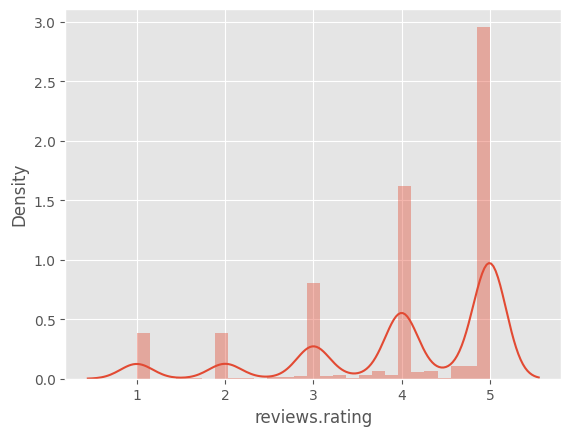

In [ ]:
sns.distplot(target);

p-value Shapiro test Original:  0.0
Asimetria: -1.1861222530123703

 ------------------------------ 

p-value Shapiro test Logaritmic:  0.0
Asimetria: -1.7529030937714738


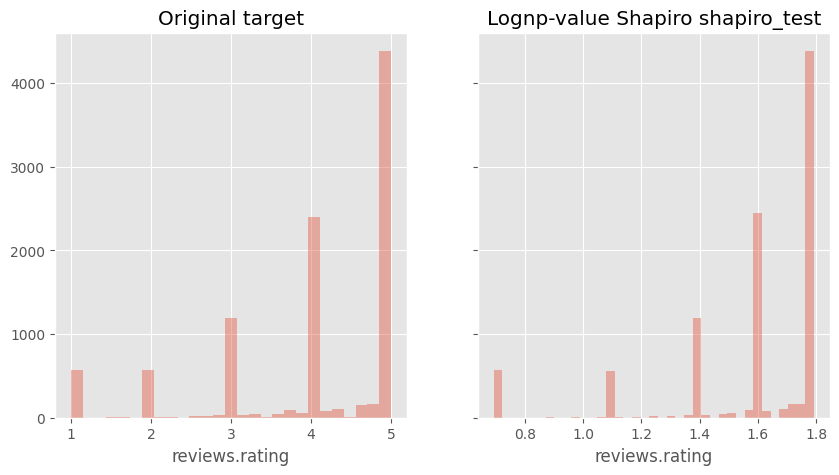

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Original target
print("p-value Shapiro test Original: ", shapiro(target).pvalue)
sns.distplot(target, kde=False, ax=axes[0])
axes[0].set_title("Original target")
print("Asimetria:", skew(target))
print('\n','-'*30,'\n')

# Logaritmic
print("p-value Shapiro test Logaritmic: ", shapiro(np.log1p(target),).pvalue)
sns.distplot(np.log1p(target),kde=False, ax=axes[1]);
axes[1].set_title("Log" + 'np-value Shapiro ' +"shapiro_test")
print("Asimetria:", skew(np.log1p(target)))



In [24]:
data['reviews.rating'].value_counts()

5.00    4384
4.00    2397
3.00    1187
1.00     572
2.00     561
4.80     162
4.60     155
4.40     102
3.75      91
4.15      78
3.95      52
3.55      50
3.35      40
3.15      37
2.90      34
2.70      23
2.50      19
2.30      12
2.10      11
1.65       8
1.45       6
1.90       4
4.50       4
3.50       2
4.25       2
1.25       2
3.25       2
2.75       1
3.45       1
4.75       1
Name: reviews.rating, dtype: int64

- Para intentar balancear la target, vamos a aplicar dos técnicas, una es la de Binning, que será reducir el espectro de posibles resultados y que se centren en los valores principales (de 1 a 5 estrellas). y luego se realizará un Oversampling, para terminar de balancear los valores con menos muestras y probaremos los resultados.

In [25]:
df = binning(df, "reviews.rating")

## Transformaciones <a class="anchor" id="seccion-11"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

- Primero vamos a proceder a extraer los meses y años en columnas independientes, de la variable "reviews.date":

In [28]:
df = extract_date(data,'reviews.date')

In [29]:
df.head(3)

id             dateAdded           dateUpdated  \
0  AVwc252WIN2L1WUfpqLP  2016-10-30T21:42:42Z  2018-09-10T21:06:27Z   
1  AVwc252WIN2L1WUfpqLP  2016-10-30T21:42:42Z  2018-09-10T21:06:27Z   
2  AVwc252WIN2L1WUfpqLP  2016-10-30T21:42:42Z  2018-09-10T21:06:27Z   

             address                                         categories  \
0  5921 Valencia Cir  Hotels,Hotels and motels,Hotel and motel reser...   
1  5921 Valencia Cir  Hotels,Hotels and motels,Hotel and motel reser...   
2  5921 Valencia Cir  Hotels,Hotels and motels,Hotel and motel reser...   

               primaryCategories             city country  \
0  Accommodation & Food Services  Rancho Santa Fe      US   
1  Accommodation & Food Services  Rancho Santa Fe      US   
2  Accommodation & Food Services  Rancho Santa Fe      US   

                                            keys   latitude   longitude  \
0  us/ca/ranchosantafe/5921valenciacir/359754519  32.990959 -117.186136   
1  us/ca/ranchosantafe/5921valenciacir/359754519  32.990959 -117.186136   
2  us/ca/ranchosantafe/5921valenciacir/359754519  32.990959 -117.186136   

                         name postalCode province reviews.date  \
0  Rancho Valencia Resort Spa      92067       CA   2013-11-14   
1  Rancho Valencia Resort Spa      92067       CA   2014-07-06   
2  Rancho Valencia Resort Spa      92067       CA   2015-01-02   

                                    reviews.dateSeen  reviews.rating  \
0  2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...             5.0   
1  2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...             5.0   
2  2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...             5.0   

                                reviews.sourceURLs  \
0  https://www.hotels.com/hotel/125419/reviews%20/   
1  https://www.hotels.com/hotel/125419/reviews%20/   
2  https://www.hotels.com/hotel/125419/reviews%20/   

                                        reviews.text  \
0  Our experience at Rancho Valencia was absolute...   
1  Amazing place. Everyone was extremely warm and...   
2  We booked a 3 night stay at Rancho Valencia to...   

                     reviews.title reviews.username  \
0  Best romantic vacation ever!!!!            Paula   
1             Sweet sweet serenity                D   
2  Amazing Property and Experience              Ron   

                                          sourceURLs  \
0  http://www.hotels.com/ho125419/%25252525253Flo...   
1  http://www.hotels.com/ho125419/%25252525253Flo...   
2  http://www.hotels.com/ho125419/%25252525253Flo...   

                        websites  \
0  http://www.ranchovalencia.com   
1  http://www.ranchovalencia.com   
2  http://www.ranchovalencia.com   

                                  reviews.text_clean reviews.text_sentiment  \
0  our experience at rancho valencia was absolute...               Positive   
1  amazing place everyone was extremely warm and ...               Positive   
2  we booked a  night stay at rancho valencia to ...               Positive   

   wordCount  reviews.text_polarity  reviews.text_subjectivity  \
0          4               0.589286                   0.642857   
1          3               0.375000                   0.531250   
2          4               0.488889                   0.538889   

               reviews.title_clean reviews.title_sentiment  \
0      best romantic vacation ever                Positive   
1             sweet sweet serenity                Positive   
2  amazing property and experience                Positive   

   reviews.title_polarity  reviews.title_subjectivity  reviews.rating_binned  \
0                    0.50                        0.40                      5   
1                    0.35                        0.65                      5   
2                    0.60                        0.90                      5   

   Year  Month  
0  2013     11  
1  2014      7  
2  2015      1

In [30]:
# Años entre los que están los comentarios
print(df['Year'].min())
print(df['Year'].max())

2002
2018


- Comenzamos trabajando con `Categories y primaryCategories`:

In [31]:
df['categories'].value_counts()

Hotels,Hotel                                                                                                                                          1905
Hotel,Hotels                                                                                                                                           403
Hotel,Hotels Motels                                                                                                                                    233
Hotels,Hotels and motels,Hotel                                                                                                                         148
Hotels,Lodging,Motels,Hotel                                                                                                                            141
                                                                                                                                                      ... 
Motels,Hotels,Corporate Lodging,Hotels Motels,Family-friendly Hotels,T

In [ ]:
# Para no cagarla en la data principal, me hago una copia de lo que quiero trabajar:
data_prueba = data.loc[:,['categories','primaryCategories']] # Una vez conseguido lo que buscaba, lo aplico a data desde aquí.

- Se va a proceder eliminar las palabras repetidas y luego se contabilizará las palabras clave de cada categoría, para que se ponga un valor mayor a los hoteles que ofrezcan más servicios:

In [32]:
def remove_duplicates(categories):
    words = categories.split(',')
    words = [word.strip().lower() for word in words]
    unique_words = set(words)
    return ' '.join(unique_words)
    

df['categories_unique'] = df['categories'].apply(remove_duplicates)


In [33]:
df['categories_unique'].value_counts()


hotel hotels                                                                                          2308
hotels motels hotel                                                                                    273
hotel hotels and motels hotels                                                                         246
hotel lodging hotels motels                                                                            223
hotel lodging hotels                                                                                   182
                                                                                                      ... 
hotel b&bs / inns hotels motels                                                                          1
business hotels lodging hotel hotels and motels family-friendly hotels hotels motels budget hotels       1
hotel hotels and motels hotel and motel mgmt.                                                            1
hotels and motels hotels hotel and mo

- Creamos una lista de las palabras clave de las categorías y luego se utiliza para calcular el score de las categorías.

In [35]:
categories_list = ["hotels","casino","general", "motels","motel","travel", 
                   "hotel","resort","stay","internet","real", "resorts","bed & breakfast",
                   "Inns", "lodging","reservations", "budget", "spa", "spas", "family-friendly", 
                   "attractions", "tourist", "mgmt.", "business","government contractors","pool","gym", 
                   "event space", "luxury","consultants", "weekend getaway", "conference room", "beach" ]

In [36]:
# Formula para añadir un punto por cada categoría que presente el hotel. 
def calculate_score(categories):
    score = 0
    categories_split = categories.split()
    for i in categories_split:
        if i in categories_list:
            score += 1
    return score

df['Score_categories'] = df['categories_unique'].apply(calculate_score)

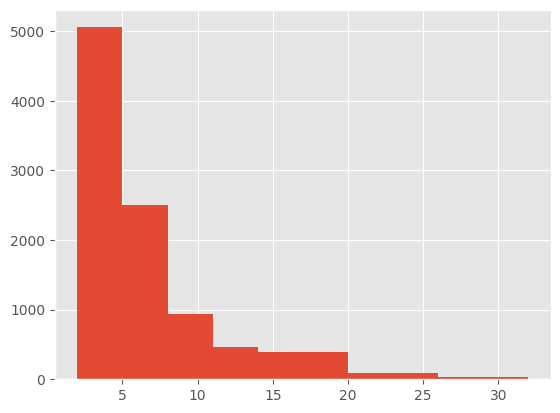

In [ ]:
data_prueba.Score_categories.hist(); # Presenta simetría, habrá que pasarle una transformación logarítmica antes de trabajar con ella.

Lo mismo con `primaryCategories`:

In [37]:
df['primaryCategories'].value_counts()


Accommodation & Food Services                                    9928
Arts Entertainment & Recreation                                    45
Healthcare & Social Assistance,Accommodation & Food Services       18
Wholesale Trade,Accommodation & Food Services                       7
Accommodation & Food Services,Arts Entertainment & Recreation       1
Utilities                                                           1
Name: primaryCategories, dtype: int64

In [38]:
df.groupby('primaryCategories')['reviews.rating'].mean()

primaryCategories
Accommodation & Food Services                                    4.032197
Accommodation & Food Services,Arts Entertainment & Recreation    4.000000
Arts Entertainment & Recreation                                  4.377778
Healthcare & Social Assistance,Accommodation & Food Services     4.222222
Utilities                                                        5.000000
Wholesale Trade,Accommodation & Food Services                    4.142857
Name: reviews.rating, dtype: float64

No creo que vaya a tener relevancia, dado que casi el 100% de los datos, se engloban en _Accommodation & Food Services_ 

In [ ]:
data_prueba2 = df[['primaryCategories','Score_categories']] # Se hacen pruebas y luego se lleva a data.

In [39]:
df['primaryCategories'] = df['primaryCategories'].astype(str)

In [40]:
# Para no caer en dar una importancia relativa en función a mi parecer, voy a asignar los valores en función a los precios que podrían suponer estos servicios.
dict_services = {"Food":1, "Accommodation":2, "Entertainment":3, "Healthcare":5, "Trade":4, "Utilities":3}

def categorize(x):
    categories = x.split(' & ')
    values = []
    for c in categories:
        for key in dict_services:
            if key in c:
                values.append(dict_services[key])
                break
        else:
            values.append(0)
    value = 0
    for v in values:
        value += v
    return value

df['Score_primaryCat'] = df['primaryCategories'].apply(categorize)

In [41]:
df['Score_primaryCat'].value_counts()

3    9982
8      18
Name: Score_primaryCat, dtype: int64

Mismo razonamiento que con `catergories`. Parece que de aquí no podremos sacar muchas más información.

---------------------------------------------------------------------------------------------------------------------------------------------------

- **Si reducimos los datos entre los años 2013 y 2018**, tendríamos el `93% de los datos`.

In [42]:
df.Year.value_counts(normalize=True).cumsum()

2016    0.4131
2015    0.6868
2017    0.7868
2014    0.8551
2013    0.8947
2018    0.9257
2012    0.9450
2011    0.9607
2009    0.9709
2010    0.9796
2007    0.9878
2008    0.9959
2006    0.9975
2005    0.9991
2004    0.9997
2003    0.9999
2002    1.0000
Name: Year, dtype: float64

- Nos quitaríamos 743 registros, que estarían alejados en el tiempo y que puede que desde entonces, ya se hayan cambiado muchas cosas en el negocio y que esas reviews ya no representen la realidad del hotel.

In [43]:
df.Year.value_counts().cumsum()


2016     4131
2015     6868
2017     7868
2014     8551
2013     8947
2018     9257
2012     9450
2011     9607
2009     9709
2010     9796
2007     9878
2008     9959
2006     9975
2005     9991
2004     9997
2003     9999
2002    10000
Name: Year, dtype: int64

- con respecto a los meses, se ve una estacionalidad que suben las valoraciones negativas en los meses de verano, pero es por el hecho de que sube el trabajo y también lo hacen las valoraciones positivas y neutrales. En general, se comportan uniforme. 

In [ ]:
df.groupby(['Month', 'reviews.text_sentiment'])['reviews.rating'].count()

Month  sentiment
1      Negative      27
       Neutral       81
       Positive     560
2      Negative      30
       Neutral       87
       Positive     552
3      Negative      36
       Neutral      114
       Positive     672
4      Negative      46
       Neutral      116
       Positive     735
5      Negative      41
       Neutral      151
       Positive     805
6      Negative      64
       Neutral      148
       Positive     835
7      Negative      76
       Neutral      159
       Positive     993
8      Negative      58
       Neutral      184
       Positive     750
9      Negative      47
       Neutral      106
       Positive     618
10     Negative      41
       Neutral      104
       Positive     620
11     Negative      39
       Neutral       84
       Positive     485
12     Negative      21
       Neutral       72
       Positive     443
Name: reviews.rating, dtype: int64

In [44]:
gb_yearRat = data.groupby('Year')['reviews.rating'].mean()

print(gb_yearRat)

Year
2002    4.000000
2003    4.000000
2004    3.833333
2005    4.062500
2006    4.250000
2007    4.060976
2008    3.827160
2009    3.960784
2010    3.827586
2011    4.031847
2012    3.765544
2013    3.874242
2014    3.790190
2015    3.954786
2016    4.119257
2017    4.176500
2018    4.176129
Name: reviews.rating, dtype: float64


- Aquí vemos algo interesante, **desde 2008 hasta 2015** (salvando 2011, que por poco, ha superado las 4 estrellas) **de media, no han podido subir a la categoría de 4 estrellas en reviews**. Sin embargo, los últimos años han conseguido mejorar esa marca y **desde 2016 hasta 2018, están por encima de los 4.10 estrellas**.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Nuevas Features <a class="anchor" id="seccion-12"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

Se añadirá datos externos que uniremos a nuestro dataset. Vamos a importar datos sobre la criminalidad en la ciudad, y las distancias hasta el centro de la ciudad en la que se encuentre el hotel.

`[OK]`   Datos de crimenes por estados.

- **Access & Use Information**

>**Public**: This dataset is intended for public access and use.
>
>**Non-Federal**: This dataset is covered by different Terms of Use than fbi.gov.
>
>**License**: See this page for license information.
>
>**Source**: [Criminal Justice Information Services Division - FBI.gov](https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/downloads/download-printable-files)

**`NOTA`**

En los datos que disponemos, usaremos la franja de tiempo del dataset que disponemos, para que sea lo más fiel a la realidad posible.

- Usaremos los años de 2002 y 2018.
- Se utilizará `Data.Totals.Violent.All`, ya que representa todos los delitos violentos, incluidos asaltos, asesinatos, violaciones y robos.
- Se dejará el dato de `Data.Population` para ver los ratios de violencia con respecto a la ciudad en cuestión.

In [48]:
df = add_extern_data_crime(df)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          10000 non-null  object        
 1   dateAdded                   10000 non-null  object        
 2   dateUpdated                 10000 non-null  object        
 3   address                     10000 non-null  object        
 4   categories                  10000 non-null  object        
 5   primaryCategories           10000 non-null  object        
 6   city                        10000 non-null  object        
 7   country                     10000 non-null  object        
 8   keys                        10000 non-null  object        
 9   latitude                    10000 non-null  float64       
 10  longitude                   10000 non-null  float64       
 11  name                        10000 non-null  object     

#### Añadimos los datos de ubicación de los centros de las ciudades de cada provincia estadounidense.

In [50]:
df = add_extern_df_distance(df)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          10000 non-null  object        
 1   dateAdded                   10000 non-null  object        
 2   dateUpdated                 10000 non-null  object        
 3   address                     10000 non-null  object        
 4   categories                  10000 non-null  object        
 5   primaryCategories           10000 non-null  object        
 6   city                        10000 non-null  object        
 7   country                     10000 non-null  object        
 8   keys                        10000 non-null  object        
 9   latitude                    10000 non-null  float64       
 10  longitude                   10000 non-null  float64       
 11  name                        10000 non-null  object     

In [52]:
from math import radians, sin, cos, sqrt, atan2

# función para calcular la distancia en metros
def haversine_distance(latitude, longitude, latitude_center, longitude_center):
    from math import radians, sin, cos, sqrt, atan2

    '''
    La fórmula de Haversine es una fórmula que permite calcular la distancia entre dos puntos en una esfera a partir de sus latitudes y longitudes.
    '''

    R = 6371e3 # radio de la Tierra en metros
    phi1 = radians(latitude)
    phi2 = radians(latitude_center)
    delta_phi = radians(latitude_center-latitude)
    delta_lambda = radians(longitude_center-longitude)
    a = sin(delta_phi/2)**2 + cos(phi1)*cos(phi2)*sin(delta_lambda/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

# aplicamos la función haversine_distance para calcular la distancia entre el hotel y el centro de la ciudad
df['distance_to_city_center'] = df.apply(lambda row: haversine_distance(row['latitude'], row['longitude'], row['latitude_center'], row['longitude_center']), axis=1)



In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          10000 non-null  object        
 1   dateAdded                   10000 non-null  object        
 2   dateUpdated                 10000 non-null  object        
 3   address                     10000 non-null  object        
 4   categories                  10000 non-null  object        
 5   primaryCategories           10000 non-null  object        
 6   city                        10000 non-null  object        
 7   country                     10000 non-null  object        
 8   keys                        10000 non-null  object        
 9   latitude                    10000 non-null  float64       
 10  longitude                   10000 non-null  float64       
 11  name                        10000 non-null  object     

- Comenzamos a trabajar con `sourceURLs`:

In [54]:
df = web_homeIndex(df)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          10000 non-null  object        
 1   dateAdded                   10000 non-null  object        
 2   dateUpdated                 10000 non-null  object        
 3   address                     10000 non-null  object        
 4   categories                  10000 non-null  object        
 5   primaryCategories           10000 non-null  object        
 6   city                        10000 non-null  object        
 7   country                     10000 non-null  object        
 8   keys                        10000 non-null  object        
 9   latitude                    10000 non-null  float64       
 10  longitude                   10000 non-null  float64       
 11  name                        10000 non-null  object     

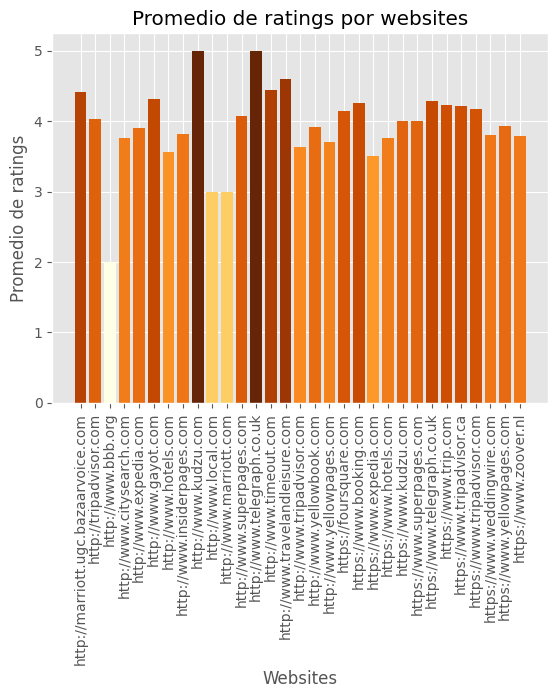

In [ ]:
grouped = df.groupby('websites_ratings')['reviews.rating'].mean()

# obtener los valores máximos y mínimos para normalizar los colores
values_min = np.min(grouped.values)
values_max = np.max(grouped.values)

# normalizar los colores en función a los datos
norm = matplotlib.colors.Normalize(vmin=values_min, vmax=values_max)

# creo un mapa de colores personalizado que varíe en función a los datos
colormap = plt.cm.YlOrBr

# aplicar el mapa de colores a las barras
bar_colors = [colormap(norm(value)) for value in grouped.values]
# veremos la relación entre las webs y los ratings obtenidos
plt.bar(grouped.index, grouped.values, color=bar_colors)

plt.title("Promedio de ratings por websites")
plt.xlabel("Websites")
plt.ylabel("Promedio de ratings")
plt.xticks(rotation=90);
plt.show()

- Según la gráfica, vemos que los que mejores valoraciones han dado son desde la web de `kudzu` y `telegraph`, sin embargo, ambas suponen un `0.2%` y `0.9%` respectivamente de todas las reviews.
- `bbb.org`, por su parte, solo aporta una valoración negativa, es decir, supone un 0,0001% del total. 
- Sin embargo, en webs como `foursquare` o `yellowpages`, que rondan entre ambas el 36% del total de las valoraciones, supera las 4 estrellas de media.

Con esto sacamos en claro que los `outliers` (que pueden rondar el 1%) no son muchos, pero se tendrá en cuenta para no desvirturar el modelo de predicción.


In [56]:
grouped = df.groupby("websites_ratings").count()

grouped

id  dateAdded  dateUpdated  address  \
websites_ratings                                                             
http://marriott.ugc.bazaarvoice.com    17         17           17       17   
http://tripadvisor.com                163        163          163      163   
http://www.bbb.org                      1          1            1        1   
http://www.citysearch.com             243        243          243      243   
http://www.expedia.com               1470       1470         1470     1470   
http://www.gayot.com                   44         44           44       44   
http://www.hotels.com                 155        155          155      155   
http://www.insiderpages.com            17         17           17       17   
http://www.kudzu.com                    1          1            1        1   
http://www.local.com                    1          1            1        1   
http://www.marriott.com                 2          2            2        2   
http://www.superpages.com              13         13           13       13   
http://www.telegraph.co.uk              3          3            3        3   
http://www.timeout.com                 40         40           40       40   
http://www.travelandleisure.com        42         42           42       42   
http://www.tripadvisor.com             99         99           99       99   
http://www.yellowbook.com            1043       1043         1043     1043   
http://www.yellowpages.com             41         41           41       41   
https://foursquare.com               2027       2027         2027     2027   
https://www.booking.com              1054       1054         1054     1054   
https://www.expedia.com                61         61           61       61   
https://www.hotels.com                123        123          123      123   
https://www.kudzu.com                  20         20           20       20   
https://www.superpages.com              3          3            3        3   
https://www.telegraph.co.uk            90         90           90       90   
https://www.trip.com                   40         40           40       40   
https://www.tripadvisor.ca             27         27           27       27   
https://www.tripadvisor.com          1391       1391         1391     1391   
https://www.weddingwire.com            57         57           57       57   
https://www.yellowpages.com          1678       1678         1678     1678   
https://www.zoover.nl                  34         34           34       34   

                                     categories  primaryCategories  city  \
websites_ratings                                                           
http://marriott.ugc.bazaarvoice.com          17                 17    17   
http://tripadvisor.com                      163                163   163   
http://www.bbb.org                            1                  1     1   
http://www.citysearch.com                   243                243   243   
http://www.expedia.com                     1470               1470  1470   
http://www.gayot.com                         44                 44    44   
http://www.hotels.com                       155                155   155   
http://www.insiderpages.com                  17                 17    17   
http://www.kudzu.com                          1                  1     1   
http://www.local.com                          1                  1     1   
http://www.marriott.com                       2                  2     2   
http://www.superpages.com                    13                 13    13   
http://www.telegraph.co.uk                    3                  3     3   
http://www.timeout.com                       40                 40    40   
http://www.travelandleisure.com              42                 42    42   
http://www.tripadvisor.com                   99                 99    99   
http://www.yellowbook.com                  1043               1043  1043   
http://www.yellowpag

In [57]:
grouped = df.groupby("websites_ratings").count()
# Filtra los valores que son menores al 5%
grouped_min_5 = grouped[grouped['sourceURLs'] >= 1000]

In [59]:
print(grouped.sourceURLs.sum())
print(grouped_min_5.sourceURLs.sum())

10000
8663


### Gráfico de tarta, donde se aprecia las webs con más de un 10% de las reviews

El total de las reviews que se grafican son 8663, siendo realmente el total, 10000. Se hace de esta forma para ver cuales son las webs que más reviews han aportado a este dataset. 

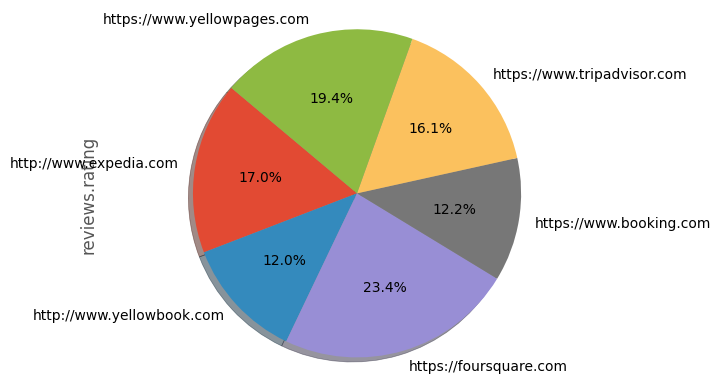

In [ ]:

reviews_count = grouped[grouped['sourceURLs'] >= 1000]["reviews.rating"]
reviews_count.plot.pie(autopct='%1.1f%%', shadow=True, startangle=140, )

web_labels = reviews_count.index.tolist()
plt.axis('equal') 
plt.show()

## Escalados <a class="anchor" id="seccion-13"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

Se realizará un Pipeline para el escalado de los modelos. Ver en los apartados de [Entrenamiento](#seccion-19)

## División de los datos <a class="anchor" id="seccion-21"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

El contenido de la sección 1.

## **Nos fijamos en la variable target: `reviews.rating`**

Lo deseable sería:

- Que tenga una `distribución normal`
- `Linearidad`: La relación entre las variables predictoras y la variable target debe ser lineal.
- `No multicolinealidad`: Las variables predictoras no deben estar altamente correlacionadas entre sí.
- `Homoscedasticidad`: La varianza de la variable target debe ser constante a lo largo del rango de las variables predictoras.
- `Pocos outliers`: Intentar reducir en la medida de lo posible los valores atípicos en la variable target que puedan afectar la precisión de la predicción.
- `Independencia`: Las observaciones deben ser independientes entre sí.

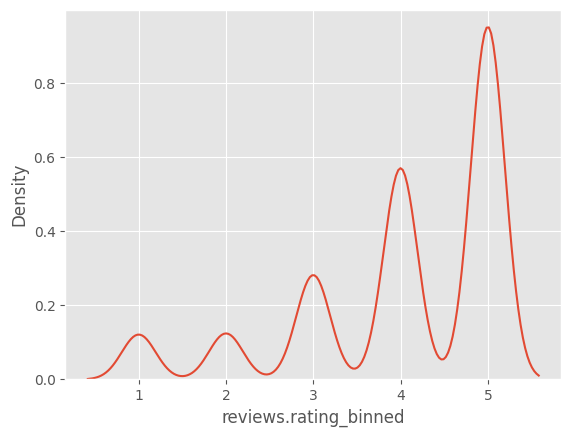

In [90]:
sns.kdeplot(y_train);

In [ ]:
# al ver que la variable presenta asimetría, vamos a intentar corregir esto aplicandole una transformación logaritmica:

y_train = np.log(y_train)
# y_train = np.exp(y_train)


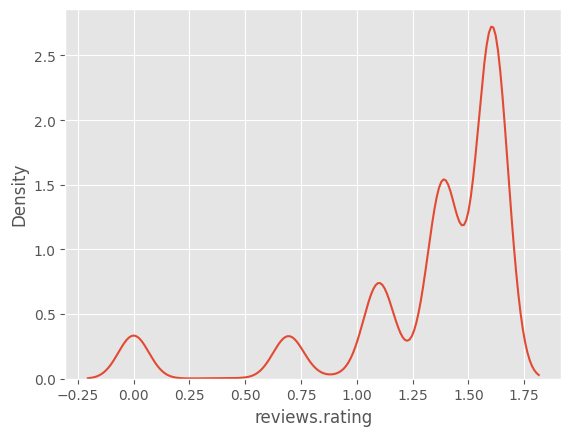

In [ ]:
sns.kdeplot(y_train);

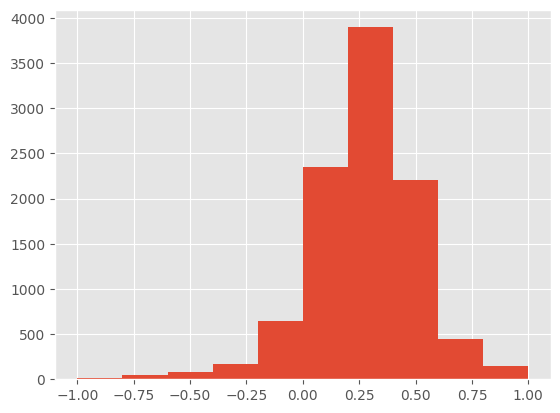

In [ ]:
X_train['polaritySentiment'].hist(); # Tiene distribución normal

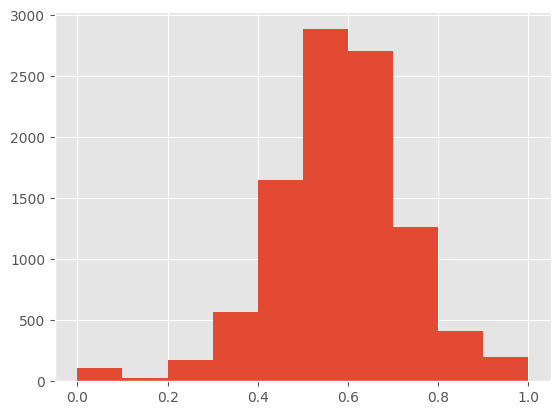

In [ ]:
data['subjectivitySentiment'].hist();  # Tiene distribución normal

In [ ]:
X_train['wordCount'] = np.log1p(X_train['wordCount'])
# X_train['wordCount'] = np.exp(X_train['wordCount'])

<AxesSubplot:>

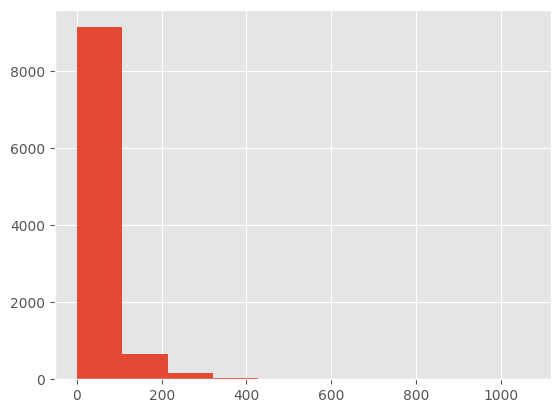

In [ ]:
data['wordCount'].hist(); #  Luego de aplicarle la transformación logaritmica, ahora sí que tiene una distribución normal.

### **Primeras impresiones:**

- Ya hemos visto que tanto la `variable target` como una de las variables predictoras no tienen una distribución normal, por lo que habrá que realizarles una **transformación logarítmica**.
- A pesar de realizarle dicha transformación, vemos que la variable continua altamente `desbalanceada`, por lo que se optará por aplicarle técnicas de **oversampling**.

------------------------------------------------------------------------------------------------

#### Vamos a dividir el dataset

In [91]:
df_selected = df[['reviews.rating_binned','wordCount','totals_crimes','distance_to_city_center','reviews.text_polarity','reviews.text_subjectivity','reviews.title_polarity','reviews.title_subjectivity']]


In [124]:
train_df = df_selected.sample(frac=0.8, random_state=10)
test_df = df_selected.drop(train_df.index)

In [125]:
df_selected.shape

(10000, 8)

In [126]:
train_df.shape


(8000, 8)

In [ ]:
train_df.to_csv('./data/train.csv', index=False, encoding='utf-8')
test_df.to_csv('./data/test.csv', index=False, encoding='utf-8')

## `Aclaración!`

Antes de realizar esta división, y siguiendo las recomendaciones de los profesores, han realizado las transformaciones previas, restando solo el oversampling, que se realizará a train y test, una vez se haya dividido las features del target.

Antes de la división de train y test, se han pasado al df general:

    - extract_date()
    - add_extern_data_crime()
    - add_extern_df_distance()
    - haversine_distance()
    - sentiment_analysis_full() 
      - clean_text()
      - count_words()
      - sentiment_analysis()
      - value_polarity()
      - value_subjectivity()
    - web_homeIndex()
    - del_null_values()
    - corregir_outliers()
    - binning()

En la memoria se plantean más funciones y formulas que una vez desarrolladas, se ha visto que no aportaban valor al estudio y se decidió no incluirlas.

### `Separamos las features de la target.`

In [127]:
train_df.columns

Index(['reviews.rating_binned', 'wordCount', 'totals_crimes',
       'distance_to_city_center', 'reviews.text_polarity',
       'reviews.text_subjectivity', 'reviews.title_polarity',
       'reviews.title_subjectivity'],
      dtype='object')

-----------------------------------------------------------------------------------------------------------------------------------------------------------

### `Caso de 4 VARIABLES:`

In [128]:
y4 = train_df['reviews.rating_binned']
X4 = train_df.drop(columns=['reviews.rating_binned','wordCount', 'totals_crimes','distance_to_city_center'])

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.20, random_state=10) 



In [129]:
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(6400, 4)
(1600, 4)
(6400,)
(1600,)


-----------------------------------------------------------------------------------------------------------------------------------------------------------

### `Caso de 7 VARIABLES:`

In [130]:
y = train_df['reviews.rating_binned']
X = train_df.drop(columns=['reviews.rating_binned'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10) 



In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 7)
(1600, 7)
(6400,)
(1600,)


-----------------------------------------------------------------------------------------------------------------------------------------------------------

### `Caso de 4 VARIABLES - OVERSAMPLING:`

In [132]:
y_over = train_df['reviews.rating_binned']
X_over = train_df.drop(columns=['reviews.rating_binned','wordCount', 'totals_crimes','distance_to_city_center'])

X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size = 0.20, random_state=10) 

In [133]:
print(X_over_train.shape)
print(X_over_test.shape)
print(y_over_train.shape)
print(y_over_test.shape)

(6400, 4)
(1600, 4)
(6400,)
(1600,)


- Con la división ya hecha, ahora podemos aplicar el `oversampling`

In [134]:
train_df["reviews.rating_binned"].value_counts(normalize=True)

5    0.469625
4    0.276500
3    0.135250
2    0.060625
1    0.058000
Name: reviews.rating_binned, dtype: float64

In [135]:

# strategy_o = {5: 4706, 4: 2774, 3: 1344, 2: 1300, 1: 1250}

print(Counter(y_over))
# define oversampling strategy
sm = SMOTE(sampling_strategy='auto')
# fit and apply the transform
X_over,y_over = sm.fit_resample(X_over,y_over)
# summarize class distribution
print(Counter(y_over))

Counter({5: 3757, 4: 2212, 3: 1082, 2: 485, 1: 464})
Counter({3: 3757, 4: 3757, 2: 3757, 5: 3757, 1: 3757})


- Esta es la opción en la que igualamos todo a la variable más alta.


In [136]:
print(X_over.shape)
print(y_over.shape)

(18785, 4)
(18785,)


### `Separamos las features de la target con Oversampling.`

In [137]:
X_over.columns

Index(['reviews.text_polarity', 'reviews.text_subjectivity',
       'reviews.title_polarity', 'reviews.title_subjectivity'],
      dtype='object')

In [138]:

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.20, random_state=10) 

In [139]:
print(X_train_over.shape)
print(X_test_over.shape)
print(y_train_over.shape)
print(y_test_over.shape)

(15028, 4)
(3757, 4)
(15028,)
(3757,)


## Feature Reduction <a class="anchor" id="seccion-14"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

Vamos a realizar dos estudios: `Principal Components Analysis` y `SelectKBest`.

### **PCA - Principal Components Analysis**

- Preparamos la data con las features numéricas para realizar nuestro `PCA`.

In [ ]:
# data_num = data[['Data.Totals.Violent.All','distance_to_city_center','wordCount', 'polaritySentiment', 'subjectivitySentiment','Score_categories', 'Score_primaryCat','polaritySentiment_title','subjectivitySentiment_title']]

In [140]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 937 to 1138
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   reviews.rating_binned       8000 non-null   int32  
 1   wordCount                   8000 non-null   int64  
 2   totals_crimes               8000 non-null   int64  
 3   distance_to_city_center     8000 non-null   float64
 4   reviews.text_polarity       8000 non-null   float64
 5   reviews.text_subjectivity   8000 non-null   float64
 6   reviews.title_polarity      8000 non-null   float64
 7   reviews.title_subjectivity  8000 non-null   float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 531.2 KB


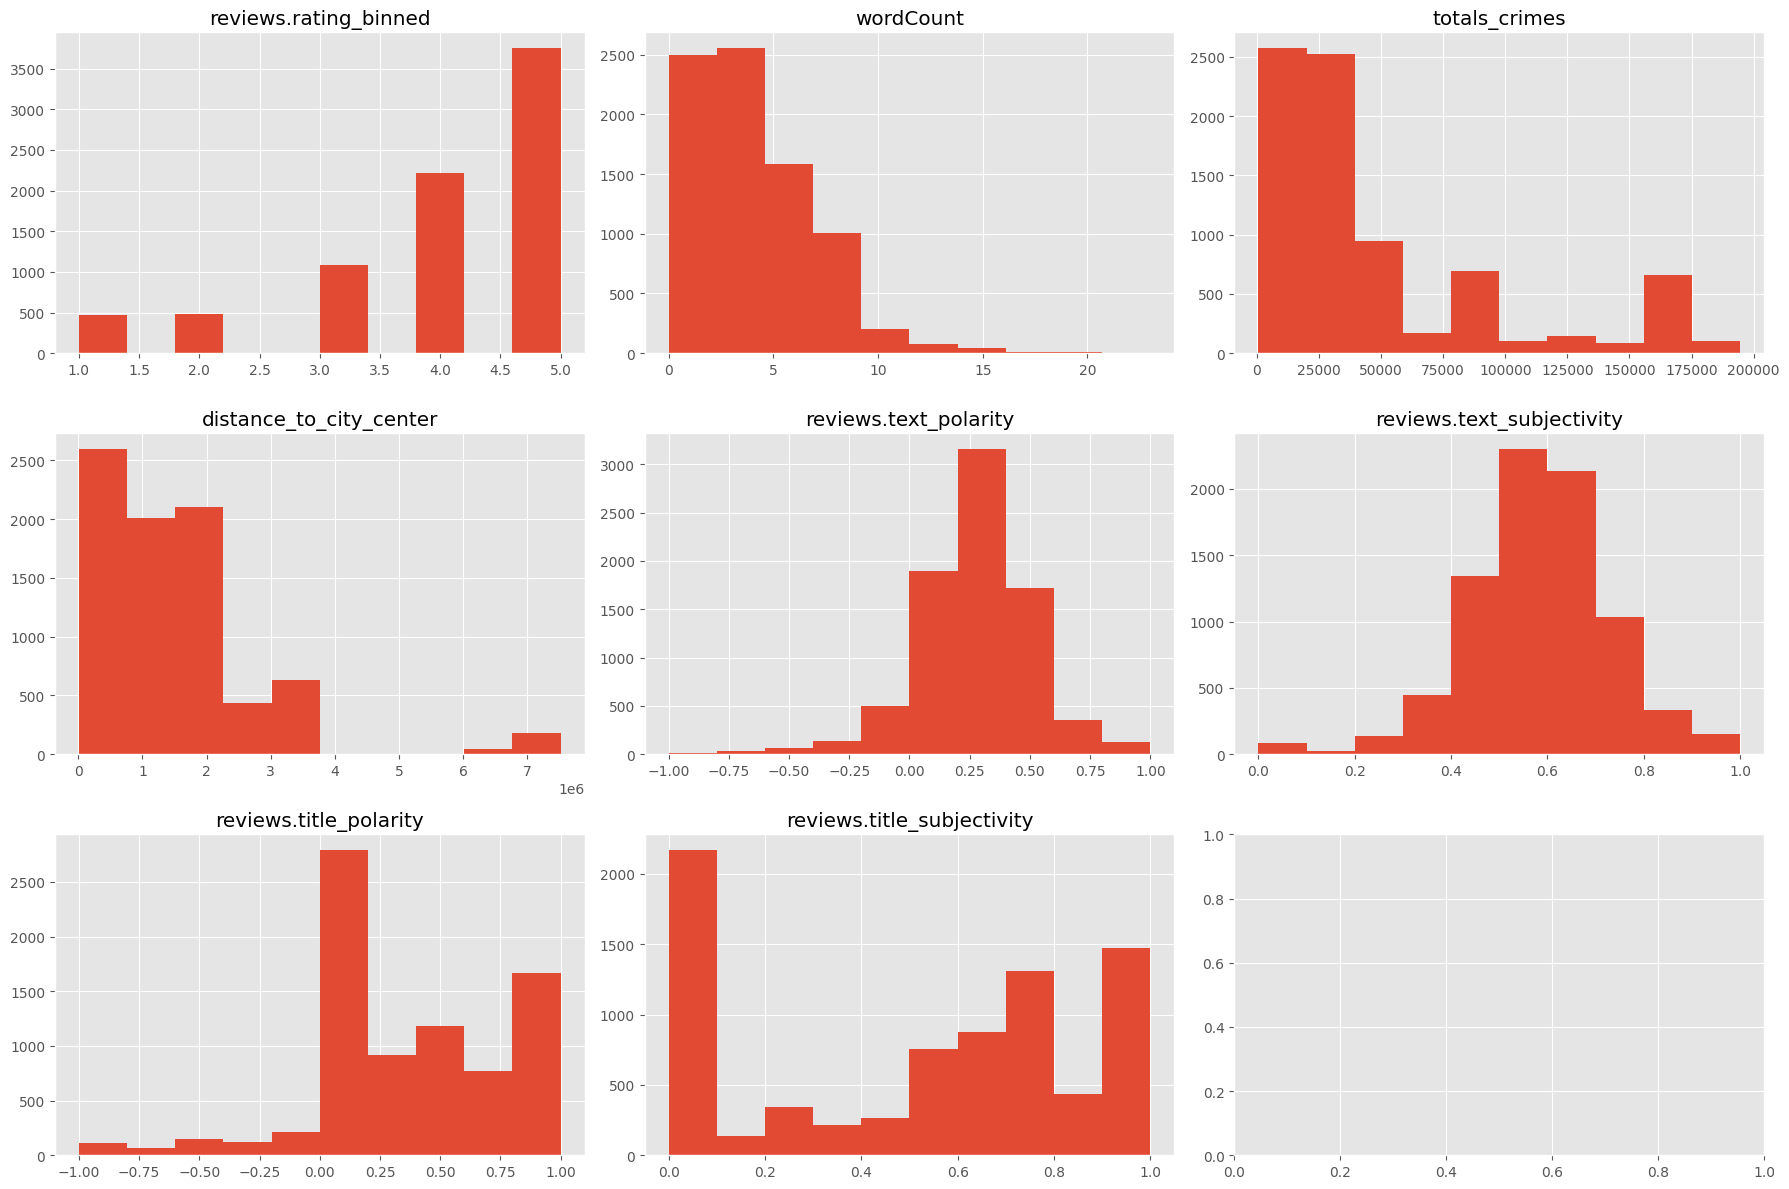

In [141]:
fig, ax = plt.subplots(3, 3, figsize=(18, 12), tight_layout=True)

for i, column in enumerate(train_df.columns):
    row = i // 3
    col = i % 3
    ax[row, col].hist(train_df[column])
    ax[row, col].set_title(column)

Vemos que la mayoría de las variables tienen asimetría, por lo que vamos a realizar una transformación logarítmica para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA.

In [142]:
eps = 1e-6
train_df = train_df.clip(lower=eps)
for i in train_df.columns:
    train_df[i] = np.log1p(train_df[i])


He utilizado el valor `eps` con el método `clip` para limitar los valores mínimos de las columnas en train_df a eps, que en este caso es un valor muy pequeño (1e-6). Después aplico el logaritmo con `np.log1p` como antes, como en los ejercicios de clase. Lo hago así porque si de inicio le paso el log1p, me salen valores de -inf en los datos.

#### Estandarizado

De momento, no es necesario dividir en train y test.

In [143]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(train_df)
df_scaled

array([[-0.66299474,  1.38952765,  1.72614076, ...,  0.58116279,
        -1.11451424, -1.44670593],
       [ 0.09774529,  1.38952765, -0.22318466, ...,  0.24620799,
         1.17413513,  0.69500628],
       [-1.64375921,  0.13429799,  0.01474183, ..., -0.07312241,
        -1.11451424, -1.44670593],
       ...,
       [ 0.09774529, -0.34222934, -0.62125179, ...,  1.02740165,
        -1.11451424, -1.44670593],
       [-3.02606909, -0.34222934, -0.56451795, ...,  0.37634972,
        -1.11451424, -1.44670593],
       [ 0.71931515,  0.52364916, -0.09255428, ...,  1.90951446,
         0.05399316,  0.58406754]])

#### Implementando PCA

In [144]:
df_scaled.shape

(8000, 8)

In [145]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(df_scaled)
X_pca

array([[ 2.19237861,  1.87587708, -0.64837574, ..., -0.3394835 ,
        -1.15135944, -0.49282618],
       [-1.30527197, -0.95250822, -0.61905839, ..., -0.21389288,
         0.33826499, -0.39712409],
       [ 1.80064536,  0.53832289,  0.87358855, ...,  0.11453455,
         1.09971952, -0.4218492 ],
       ...,
       [ 1.30532729,  0.18551513,  1.35719478, ...,  0.39391219,
        -1.40133682, -0.23669458],
       [ 3.16238119, -0.52280344,  0.32300684, ..., -0.24763149,
         0.07033737, -0.87356569],
       [-1.68952626,  0.85116963,  0.64501623, ...,  0.51473427,
        -0.36161853,  0.42846563]])

In [146]:
pca.components_


array([[-0.44692233,  0.01179064,  0.01646525, -0.06210049, -0.45636335,
        -0.33951033, -0.53250875, -0.4346188 ],
       [ 0.06767211, -0.17178812,  0.6453506 , -0.64575617,  0.19884013,
         0.21495072, -0.13526093, -0.1685057 ],
       [ 0.21194092, -0.26877112, -0.28068336,  0.27843892,  0.41691115,
         0.35829206, -0.37730143, -0.53102474],
       [ 0.07850913,  0.94214412,  0.09246363,  0.02241364,  0.12346665,
         0.19192463, -0.15198772, -0.1482212 ],
       [-0.65245048, -0.02820065, -0.15826979, -0.06514453, -0.0666113 ,
         0.69305204, -0.0323755 ,  0.24168905],
       [ 0.1050749 ,  0.08411554, -0.68564   , -0.70418422,  0.06536136,
        -0.10230888,  0.01037497, -0.03254798],
       [-0.51638219,  0.04100627,  0.02660435,  0.029824  ,  0.74019057,
        -0.42268969,  0.02170382,  0.05523548],
       [ 0.20301566, -0.03039966, -0.00771437,  0.01015887,  0.08090074,
        -0.06217599, -0.72873548,  0.64516014]])

#### Aportación de cada PCA

In [147]:
pca.explained_variance_ratio_.cumsum()


array([0.28673659, 0.4519403 , 0.61456703, 0.7357299 , 0.83768525,
       0.92209086, 0.97254651, 1.        ])

In [148]:
pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,9))


1    0.286737
2    0.451940
3    0.614567
4    0.735730
5    0.837685
6    0.922091
7    0.972547
8    1.000000
dtype: float64

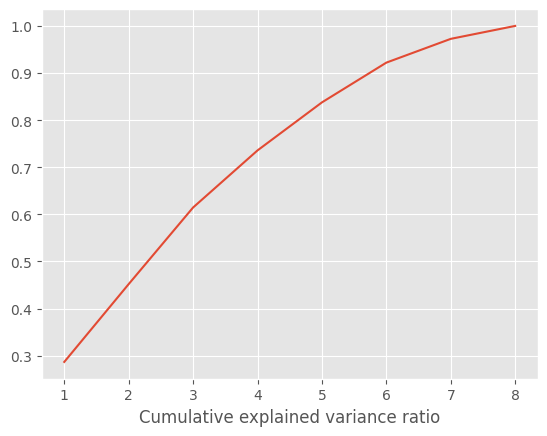

In [149]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,9)))
plt.xlabel("Number of principal components")
plt.xlabel("Cumulative explained variance ratio")
plt.xticks(np.arange(1,9));

Vamos a quedarnos con los **6 primeros PCA**, así reducimos la complejidad del espacio muestral y conservamos toda la información posible. 

In [150]:
pca6 = PCA(n_components=6)
X_pca6 = pca6.fit_transform(df_scaled)
X_pca6.shape

(8000, 6)

In [151]:
df_pca_comp = pd.DataFrame(pca6.components_, columns= train_df.columns, index=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca_comp

reviews.rating_binned  wordCount  totals_crimes  distance_to_city_center  \
PC1              -0.446922   0.011791       0.016465                -0.062100   
PC2               0.067672  -0.171788       0.645351                -0.645756   
PC3               0.211941  -0.268771      -0.280683                 0.278439   
PC4               0.078509   0.942144       0.092464                 0.022414   
PC5              -0.652450  -0.028201      -0.158270                -0.065145   
PC6               0.105075   0.084116      -0.685640                -0.704184   

     reviews.text_polarity  reviews.text_subjectivity  reviews.title_polarity  \
PC1              -0.456363                  -0.339510               -0.532509   
PC2               0.198840                   0.214951               -0.135261   
PC3               0.416911                   0.358292               -0.377301   
PC4               0.123467                   0.191925               -0.151988   
PC5              -0.066611                   0.693052               -0.032376   
PC6               0.065361                  -0.102309                0.010375   

     reviews.title_subjectivity  
PC1                   -0.434619  
PC2                   -0.168506  
PC3                   -0.531025  
PC4                   -0.148221  
PC5                    0.241689  
PC6                   -0.032548

In [152]:
df_model = pd.DataFrame(X_pca6, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_model

PC1       PC2       PC3       PC4       PC5       PC6
0     2.192379  1.875877 -0.648376  1.681105  0.403862 -0.339483
1    -1.305272 -0.952508 -0.619058  1.137126  0.155493 -0.213893
2     1.800645  0.538323  0.873589  0.416406  0.692463  0.114535
3     1.040395  2.794632  0.614048  0.291670 -0.299532  0.083520
4    -0.298955 -1.388049  0.134624  0.991482  0.843113  0.121351
...        ...       ...       ...       ...       ...       ...
7995 -0.859418 -1.152096 -0.291224 -0.633942 -0.509562 -0.031596
7996  2.076089  0.344740 -0.177733  0.913815 -1.802107 -0.968652
7997  1.305327  0.185515  1.357195  0.075294  0.524099  0.393912
7998  3.162381 -0.522803  0.323007 -0.351900  2.112794 -0.247631
7999 -1.689526  0.851170  0.645016  0.928705  0.966807  0.514734

[8000 rows x 6 columns]

**Finalmente hemos recogido en 6 variables, más del 92% de las varianzas.**

### **SelectKBest y Correlación**

Vamos a ver que información nos arroja este tipo de estadístico, y si a priori puede funciónar mejor que los PC calculados anteriormente.

Partimos de los valores númericos de data:

In [153]:
# Separamos X e y
X_ = train_df
y_ = train_df['reviews.rating_binned']

In [154]:
seed = 10

X_train_KBest, X_test_KBest, y_train_KBest, y_test_KBest = train_test_split(X_,y_, test_size=0.2, random_state=seed)

print(X_train_KBest.shape)
print(X_test_KBest.shape)
print(y_train_KBest.shape)
print(y_test_KBest.shape)

(6400, 8)
(1600, 8)
(6400,)
(1600,)


In [155]:
scaler = StandardScaler()
X_train_scal_KBest = scaler.fit_transform(X_train_KBest)
X_test_scal_KBest = scaler.transform(X_test_KBest)

In [156]:
X_new = SelectKBest(f_regression, k=4).fit_transform(X_train_scal_KBest, y_train )

In [157]:
X_train_scal_KBest[0:5]

array([[ 0.10649106,  0.8510363 , -1.23260959,  1.80972104,  0.89714673,
         1.02531942, -1.10517994, -1.43581161],
       [-0.64747183,  0.8510363 ,  1.34897435,  0.3144366 , -0.45640323,
        -0.47464334, -0.21692034,  0.23449566],
       [ 0.72252361,  0.52242322,  1.34897435,  0.1344121 , -0.35258863,
        -1.21078699, -1.10517994, -1.43581161],
       [ 0.10649106, -0.34193327, -0.53645498, -0.17661193, -1.63392744,
        -0.99529277, -1.10517994, -1.43581161],
       [-0.64747183,  0.13375643, -0.63120358,  0.76430141, -0.42065777,
        -0.18474269,  0.01495056,  0.10952455]])

In [158]:
X_new[0:5]

array([[ 0.10649106,  0.89714673,  1.02531942, -1.10517994],
       [-0.64747183, -0.45640323, -0.47464334, -0.21692034],
       [ 0.72252361, -0.35258863, -1.21078699, -1.10517994],
       [ 0.10649106, -1.63392744, -0.99529277, -1.10517994],
       [-0.64747183, -0.42065777, -0.18474269,  0.01495056]])

#### Análisis de correlación con estos datos

In [159]:
out_list = []
for column in X_train.columns:
    corr_tuple = pearsonr(X_train_KBest[column], y_train_KBest)
    out_list.append([column, corr_tuple[0], corr_tuple[1]])

In [160]:
corr_df = pd.DataFrame(out_list, columns=['features', 'Correlation', 'P-value'])

In [161]:
corr_df.sort_values(by=['P-value'], inplace=True)

In [162]:
corr_df

features  Correlation        P-value
3       reviews.text_polarity     0.505957   0.000000e+00
5      reviews.title_polarity     0.398961  3.457957e-243
4   reviews.text_subjectivity     0.193163   7.612445e-55
6  reviews.title_subjectivity     0.162119   6.075368e-39
2     distance_to_city_center     0.060523   1.263770e-06
0                   wordCount    -0.029289   1.912120e-02
1               totals_crimes    -0.003512   7.787591e-01

El concepto aquí es que cuando menor es el p-value, mayor es la importancia de la relación con la target.

Efectivamente, SelectKBest ha escogido los valores que mejor predicen para el modelo.

#### Conclusión sobre estos análisis:

en base a lo ya estudiado, vamos a escoger para nuestro modelo, `reviews.text_polarity`, `reviews.title_polarity`, `reviews.text_subjectivity` y `reviews.title_subjectivity` como feactures para predecir.


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Escoger métrica del modelo <a class="anchor" id="seccion-15"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)


El Mean Squared Error (MSE) es una de las métricas de evaluación más comunes en modelos de regresión y se utiliza para medir el error cuadrático medio de las predicciones del modelo en relación con los valores reales. Se define como la media de los cuadrados de las diferencias entre los valores predichos y los valores reales, además, es perfecto para comparar entre los demás modelos, que es lo que haremos, por lo que nos viene bien para el caso.

Hay varias razones por las que el MSE es una buena métrica para modelos de regresión:

- Es fácil de entender y calcular: La fórmula del MSE es relativamente simple, por lo que es fácil de calcular y comprender.

- Penaliza los errores grandes: Al elevar al cuadrado las diferencias entre las predicciones y los valores reales, el MSE penaliza los errores grandes más que los errores pequeños. Esto es importante porque los errores grandes pueden tener un gran impacto en la calidad general del modelo.

- Es diferenciable: El MSE es diferenciable, lo que lo hace útil para optimizar los parámetros del modelo utilizando técnicas de optimización como la regresión lineal o los árboles de decisión.

## Entrenamiento <a class="anchor" id="seccion-19"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)

Se harán 3 rondas de entrenamientos:

- Entrenamiento con 7 variables.
- Entrenamiento con 4 variables.
- Entrenamiento con 4 variables oversampling.
- Entrenamiento final más exahustivo a la mejor variable para obtener el mejor resultado.

## Entrenamiento con 7 variables <a class="anchor" id="seccion-16"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)



## **ENTRENAMIENTO CON 7 VARIABLES PREDICTORAS**

### **Escalado**

In [163]:
# Metemos en un pipeline el escalado 
pipe_escal = Pipeline([
    ('scaler', StandardScaler())
])

X_train_scaled = pipe_escal.fit_transform(X_train)
X_test_scaled = pipe_escal.transform(X_test)

### **Hiperparámetros**

In [171]:
# LINEAR REGRESSOR
grid_linear_reg = {
"linreg__fit_intercept": [True], # Parámetro para indicar si se debe calcular un intercepto o no
"linreg__normalize": [True], # Parámetro para indicar si se deben normalizar las variables independientes
"linreg__n_jobs": [-1] # Parámetro para indicar que se usen todos los recursos para el procesamiento en la CPU.
}

# POLYNOMICAL REGRESSOR
grid_poly_reg = {
    "polyreg__degree": [2, 3, 4, 5],
    "linreg__fit_intercept": [True],
    "linreg__normalize": [True],
}

# DECISSION TREE REGRESSOR
grid_dtree_reg = {
"dtr__criterion": ["squared_error", "absolute_error"], # Criterio para medir la impureza de un nodo
"dtr__splitter": ["best"], # Estrategia para seleccionar la mejor división
"dtr__min_samples_leaf": [2,4,6,8],  #El número mínimo de muestras requeridas para estar en un nodo hoja.
"dtr__max_depth": [2, 3, 4, 5], # Profundidad máxima del árbol
"dtr__min_samples_split": [2, 5, 8, 10] # Número mínimo de muestras necesarias para dividir un nodo
}

# RANDOM FOREST REGRESSOR
grid_rf_reg = { "rfr__n_estimators": [10, 50, 100], # Número de árboles en el bosque.
"rfr__max_depth": [5, 10, 15], # Profundidad máxima de los árboles.
"rfr__min_samples_split": [2, 5, 10], # Número mínimo de samples requeridos para hacer un split en un nodo
"rfr__min_samples_leaf": [1, 2, 4], # Número mínimo de samples en un nodo
"rfr__max_features": ["auto", "sqrt", "log2"] # Número de features a considerar en cada split
}

### **Definimos pipelines y probamos**

In [165]:
pipeline_lin_reg = Pipeline([
("scaler", StandardScaler()),
("linreg", LinearRegression())
])

pipeline_poly_reg = Pipeline([
("scaler", StandardScaler()),
("polyreg", PolynomialFeatures()),
("linreg", LinearRegression())
])

pipeline_dtr = Pipeline([
("scaler", StandardScaler()),
("dtr", DecisionTreeRegressor())
])

pipeline_rfr = Pipeline([
("scaler", StandardScaler()),
("rfr", RandomForestRegressor())
])

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Hora de entrenar los modelos**

In [ ]:
print(pipeline_rfr.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'rfr', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'rfr__bootstrap', 'rfr__ccp_alpha', 'rfr__criterion', 'rfr__max_depth', 'rfr__max_features', 'rfr__max_leaf_nodes', 'rfr__max_samples', 'rfr__min_impurity_decrease', 'rfr__min_samples_leaf', 'rfr__min_samples_split', 'rfr__min_weight_fraction_leaf', 'rfr__n_estimators', 'rfr__n_jobs', 'rfr__oob_score', 'rfr__random_state', 'rfr__verbose', 'rfr__warm_start'])


In [166]:
# Linear Regression GridSearchCV

grid_search_lin_reg = GridSearchCV(pipeline_lin_reg, grid_linear_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_lin_reg.fit(X_train, y_train)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linreg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linreg__fit_intercept': [True],
                         'linreg__n_jobs': [-1], 'linreg__normalize': [True]},
             scoring='neg_mean_squared_error', verbose=1)

In [167]:
# Polynomial Features Regression GridSearchCV

grid_search_poly_reg = GridSearchCV(pipeline_poly_reg, grid_poly_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_poly_reg.fit(X_train, y_train)

Fitting 7 folds for each of 4 candidates, totalling 28 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polyreg', PolynomialFeatures()),
                                       ('linreg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linreg__fit_intercept': [True],
                         'linreg__normalize': [True],
                         'polyreg__degree': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [168]:
# Decision Tree Regression GridSearchCV

grid_search_dtr = GridSearchCV(pipeline_dtr, grid_dtree_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_dtr.fit(X_train, y_train)

Fitting 7 folds for each of 128 candidates, totalling 896 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dtr', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'dtr__criterion': ['squared_error', 'absolute_error'],
                         'dtr__max_depth': [2, 3, 4, 5],
                         'dtr__min_samples_leaf': [2, 4, 6, 8],
                         'dtr__min_samples_split': [2, 5, 8, 10],
                         'dtr__splitter': ['best']},
             scoring='neg_mean_squared_error', verbose=1)

In [172]:
# Random Forest Regression GridSearchCV

grid_search_rfr = GridSearchCV(pipeline_rfr, grid_rf_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_rfr.fit(X_train, y_train)

Fitting 7 folds for each of 243 candidates, totalling 1701 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfr', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [5, 10, 15],
                         'rfr__max_features': ['auto', 'sqrt', 'log2'],
                         'rfr__min_samples_leaf': [1, 2, 4],
                         'rfr__min_samples_split': [2, 5, 10],
                         'rfr__n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [173]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_lin_reg = ('Linear Regression', grid_search_lin_reg.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_lin_reg]
best_grids_df_lr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_lr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_lr)

print('\n','-'*50,'\n')

y_pred = grid_search_lin_reg.predict(X_test)

print("Score del modelo (R^2):", round(grid_search_lin_reg.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test), 4))

               Model  Best Score
0  Linear Regression    -0.85628

 -------------------------------------------------- 

Score del modelo (R^2): -0.8453
R^2 score: -0.5628
MAE score: 0.7103
MSE score: 0.8092
RMSE score: 0.8995
MAPE score: 25.6347


In [174]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_poly_reg = ('Polynomical Features', grid_search_poly_reg.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_poly_reg]
best_grids_df_p = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_p.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_p)

print('\n','-'*50,'\n')

y_pred = grid_search_poly_reg.predict(X_test)

print("Score del modelo (R^2):", round(grid_search_poly_reg.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test), 4))

                  Model  Best Score
0  Polynomical Features   -0.803107

 -------------------------------------------------- 

Score del modelo (R^2): -0.763
R^2 score: -0.2974
MAE score: 0.673
MSE score: 0.7584
RMSE score: 0.8709
MAPE score: 24.1018


In [175]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_dtr = ('Decission Tree Regressor', grid_search_dtr.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_dtr]
best_grids_df_dtr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_dtr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_dtr)

print('\n','-'*50,'\n')

y_pred = grid_search_dtr.predict(X_test)

print("Score del modelo (R^2):", round(grid_search_dtr.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test), 4))

                      Model  Best Score
0  Decission Tree Regressor   -0.809677

 -------------------------------------------------- 

Score del modelo (R^2): -0.7549
R^2 score: -0.2801
MAE score: 0.6711
MSE score: 0.7545
RMSE score: 0.8686
MAPE score: 23.9743


In [176]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_rfr = ('Random Forest Regressor', grid_search_rfr.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_rfr]
best_grids_df_rfr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_rfr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_rfr)

print('\n','-'*50,'\n')

y_pred = grid_search_rfr.predict(X_test)

print("Score del modelo (R^2):", round(grid_search_rfr.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test), 4))

                     Model  Best Score
0  Random Forest Regressor    -0.75174

 -------------------------------------------------- 

Score del modelo (R^2): -0.4021
R^2 score: -0.2905
MAE score: 0.6613
MSE score: 0.7196
RMSE score: 0.8483
MAPE score: 23.6818


In [177]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_rfr = ('Random Forest Regressor', grid_search_rfr.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_rfr]
best_grids_df_rfr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_rfr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_rfr)

print('\n','-'*50,'\n')

y_pred = grid_search_rfr.predict(X_test)

print("Score del modelo (R^2):", round(grid_search_rfr.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test), 4))

                     Model  Best Score
0  Random Forest Regressor    -0.75174

 -------------------------------------------------- 

Score del modelo (R^2): -0.4021
R^2 score: -0.2905
MAE score: 0.6613
MSE score: 0.7196
RMSE score: 0.8483
MAPE score: 23.6818


In [178]:
results = pd.concat([best_grids_df_lr,best_grids_df_p,best_grids_df_dtr,best_grids_df_rfr]).sort_values(by='Best Score',ascending=False)


In [179]:
results

Model  Best Score
0   Random Forest Regressor   -0.751740
0      Polynomical Features   -0.803107
0  Decission Tree Regressor   -0.809677
0         Linear Regression   -0.856280

In [180]:
# El mejor ha sido RFR. Ya esta entrenada con todo train
grid_search_rfr.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(max_depth=15, max_features='sqrt',
                                       min_samples_leaf=2,
                                       min_samples_split=5))])

In [181]:
# La probamos en test
grid_search_rfr.best_estimator_.score(X_test, y_test)

0.4426848414437794

- Procedemos a guardar los resultados en modelos entrenados y probarlos con los datos de test en el archivo `predict.py`

In [183]:
# Guardar los modelos

save_model(grid_search_lin_reg, zip_file="model.zip")
save_model(grid_search_poly_reg, zip_file="model.zip")
save_model(grid_search_dtr, zip_file="model.zip")
save_model(grid_search_rfr, zip_file="model.zip")

el archivo se guardará en:  model.zip
el archivo se guardará en:  model.zip
el archivo se guardará en:  model.zip
el archivo se guardará en:  model.zip


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Entrenamiento con 4 variables <a class="anchor" id="seccion-17"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)



## **ENTRENAMIENTO CON 4 VARIABLES PREDICTORAS**

In [184]:
print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(6400, 4)
(1600, 4)
(6400,)
(1600,)


### **Escalado**

In [185]:
# Metemos en un pipeline el escalado 
pipe_escal = Pipeline([
    ('scaler', StandardScaler())
])

X4_train_scaled = pipe_escal.fit_transform(X4_train)
X4_test_scaled = pipe_escal.transform(X4_test)

### **Hiperparámetros**

In [188]:
# LINEAR REGRESSOR
grid_linear_reg = {
"linreg__fit_intercept": [True], # Parámetro para indicar si se debe calcular un intercepto o no
"linreg__normalize": [True], # Parámetro para indicar si se deben normalizar las variables independientes
"linreg__n_jobs": [-1] # Parámetro para indicar que se usen todos los recursos para el procesamiento en la CPU.
}

# POLYNOMICAL REGRESSOR
grid_poly_reg = {
    "polyreg__degree": [2, 3, 4],
    "linreg__fit_intercept": [True],
    "linreg__normalize": [True],
}

# DECISSION TREE REGRESSOR
grid_dtree_reg = {
"dtr__criterion": ["squared_error", "absolute_error"], # Criterio para medir la impureza de un nodo
"dtr__splitter": ["best"], # Estrategia para seleccionar la mejor división
"dtr__min_samples_leaf": [2,4,6,8],  #El número mínimo de muestras requeridas para estar en un nodo hoja.
"dtr__max_depth": [2, 3, 4, 5], # Profundidad máxima del árbol
"dtr__min_samples_split": [2, 5, 8, 10] # Número mínimo de muestras necesarias para dividir un nodo
}

# RANDOM FOREST REGRESSOR
grid_rf_reg = { "rfr__n_estimators": [10, 50, 100], # Número de árboles en el bosque.
"rfr__max_depth": [5, 10, 15], # Profundidad máxima de los árboles.
"rfr__min_samples_split": [2, 5, 10], # Número mínimo de samples requeridos para hacer un split en un nodo
"rfr__min_samples_leaf": [1, 2, 4], # Número mínimo de samples en un nodo
"rfr__max_features": ["auto", "sqrt", "log2"] # Número de features a considerar en cada split
}

### **Definimos pipelines y probamos**

In [189]:
pipeline_lin_reg = Pipeline([
("scaler", StandardScaler()),
("linreg", LinearRegression())
])

pipeline_poly_reg = Pipeline([
("scaler", StandardScaler()),
("polyreg", PolynomialFeatures()),
("linreg", LinearRegression())
])

pipeline_dtr = Pipeline([
("scaler", StandardScaler()),
("dtr", DecisionTreeRegressor())
])

pipeline_rfr = Pipeline([
("scaler", StandardScaler()),
("rfr", RandomForestRegressor())
])

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Hora de entrenar los modelos**

In [ ]:
print(pipeline_rfr.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'rfr', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'rfr__bootstrap', 'rfr__ccp_alpha', 'rfr__criterion', 'rfr__max_depth', 'rfr__max_features', 'rfr__max_leaf_nodes', 'rfr__max_samples', 'rfr__min_impurity_decrease', 'rfr__min_samples_leaf', 'rfr__min_samples_split', 'rfr__min_weight_fraction_leaf', 'rfr__n_estimators', 'rfr__n_jobs', 'rfr__oob_score', 'rfr__random_state', 'rfr__verbose', 'rfr__warm_start'])


In [193]:
# Linear Regression GridSearchCV

grid_search_lin_reg = GridSearchCV(pipeline_lin_reg, grid_linear_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_lin_reg.fit(X4_train, y4_train)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linreg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linreg__fit_intercept': [True],
                         'linreg__n_jobs': [-1], 'linreg__normalize': [True]},
             scoring='neg_mean_squared_error', verbose=1)

In [194]:
# Polynomial Features Regression GridSearchCV

grid_search_poly_reg = GridSearchCV(pipeline_poly_reg, grid_poly_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_poly_reg.fit(X4_train, y4_train)

Fitting 7 folds for each of 3 candidates, totalling 21 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polyreg', PolynomialFeatures()),
                                       ('linreg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linreg__fit_intercept': [True],
                         'linreg__normalize': [True],
                         'polyreg__degree': [2, 3, 4]},
             scoring='neg_mean_squared_error', verbose=1)

In [195]:
# Decision Tree Regression GridSearchCV

grid_search_dtr = GridSearchCV(pipeline_dtr, grid_dtree_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_dtr.fit(X4_train, y4_train)

Fitting 7 folds for each of 128 candidates, totalling 896 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dtr', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'dtr__criterion': ['squared_error', 'absolute_error'],
                         'dtr__max_depth': [2, 3, 4, 5],
                         'dtr__min_samples_leaf': [2, 4, 6, 8],
                         'dtr__min_samples_split': [2, 5, 8, 10],
                         'dtr__splitter': ['best']},
             scoring='neg_mean_squared_error', verbose=1)

In [196]:
# Random Forest Regression GridSearchCV

grid_search_rfr = GridSearchCV(pipeline_rfr, grid_rf_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_rfr.fit(X4_train, y4_train)

Fitting 7 folds for each of 243 candidates, totalling 1701 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfr', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [5, 10, 15],
                         'rfr__max_features': ['auto', 'sqrt', 'log2'],
                         'rfr__min_samples_leaf': [1, 2, 4],
                         'rfr__min_samples_split': [2, 5, 10],
                         'rfr__n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [198]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_lin_reg = ('Linear Regression - 4 Features', grid_search_lin_reg.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_lin_reg]
best_grids_df_lr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_lr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_lr)

print('\n','-'*50,'\n')

y_pred = grid_search_lin_reg.predict(X4_test)

print("Score del modelo (R^2):", round(grid_search_lin_reg.score(X4, y4), 4))
print("R^2 score:", round(r2_score(y_pred, y4_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y4_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y4_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y4_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y4_test), 4))

                            Model  Best Score
0  Linear Regression - 4 Features   -0.856142

 -------------------------------------------------- 

Score del modelo (R^2): -0.8459
R^2 score: -0.5667
MAE score: 0.7112
MSE score: 0.81
RMSE score: 0.9
MAPE score: 25.6543


In [199]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_poly_reg = ('Polynomical Features - 4 Features', grid_search_poly_reg.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_poly_reg]
best_grids_df_p = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_p.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_p)

print('\n','-'*50,'\n')

y_pred = grid_search_poly_reg.predict(X4_test)

print("Score del modelo (R^2):", round(grid_search_poly_reg.score(X4, y4), 4))
print("R^2 score:", round(r2_score(y_pred, y4_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y4_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y4_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y4_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y4_test), 4))

                               Model  Best Score
0  Polynomical Features - 4 Features   -0.784572

 -------------------------------------------------- 

Score del modelo (R^2): -0.7531
R^2 score: -0.2326
MAE score: 0.6643
MSE score: 0.7299
RMSE score: 0.8543
MAPE score: 23.5306


In [200]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_dtr = ('Decission Tree Regressor - 4 Features', grid_search_dtr.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_dtr]
best_grids_df_dtr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_dtr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_dtr)

print('\n','-'*50,'\n')

y_pred = grid_search_dtr.predict(X4_test)

print("Score del modelo (R^2):", round(grid_search_dtr.score(X4, y4), 4))
print("R^2 score:", round(r2_score(y_pred, y4_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y4_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y4_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y4_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y4_test), 4))

                                   Model  Best Score
0  Decission Tree Regressor - 4 Features   -0.802904

 -------------------------------------------------- 

Score del modelo (R^2): -0.762
R^2 score: -0.3084
MAE score: 0.6731
MSE score: 0.765
RMSE score: 0.8747
MAPE score: 24.1701


In [201]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_rfr = ('Random Forest Regressor - 4 Features', grid_search_rfr.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_rfr]
best_grids_df_rfr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_rfr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_rfr)

print('\n','-'*50,'\n')

y_pred = grid_search_rfr.predict(X4_test)

print("Score del modelo (R^2):", round(grid_search_rfr.score(X4, y4), 4))
print("R^2 score:", round(r2_score(y_pred, y4_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y4_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y4_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y4_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y4_test), 4))

                                  Model  Best Score
0  Random Forest Regressor - 4 Features   -0.761333

 -------------------------------------------------- 

Score del modelo (R^2): -0.5996
R^2 score: -0.231
MAE score: 0.6554
MSE score: 0.7218
RMSE score: 0.8496
MAPE score: 23.4211


In [202]:
results = pd.concat([best_grids_df_lr,best_grids_df_p,best_grids_df_dtr,best_grids_df_rfr]).sort_values(by='Best Score',ascending=False)

In [203]:
results

Model  Best Score
0   Random Forest Regressor - 4 Features   -0.761333
0      Polynomical Features - 4 Features   -0.784572
0  Decission Tree Regressor - 4 Features   -0.802904
0         Linear Regression - 4 Features   -0.856142

In [204]:
# El mejor ha sido RFR. Ya esta entrenada con todo train
grid_search_rfr.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(max_depth=10, max_features='log2',
                                       min_samples_leaf=2,
                                       min_samples_split=10))])

In [206]:
# La probamos en test
grid_search_rfr.best_estimator_.score(X4_test, y4_test)

0.441003848131421

- Procedemos a guardar los resultados en modelos entrenados y probarlos con los datos de test en el archivo `predict.py`

In [207]:
# Guardar los modelos

save_model(grid_search_lin_reg, zip_file="model.zip")
save_model(grid_search_poly_reg, zip_file="model.zip")
save_model(grid_search_dtr, zip_file="model.zip")
save_model(grid_search_rfr, zip_file="model.zip")

el archivo se guardará en:  model.zip
el archivo se guardará en:  model.zip
el archivo se guardará en:  model.zip
el archivo se guardará en:  model.zip


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Entrenamiento con 4 variables Oversampling <a class="anchor" id="seccion-18"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)



## **ENTRENAMIENTO CON 4 VARIABLES PREDICTORAS Y OVERSAMPLING**

### **Escalado**

In [ ]:
# Metemos en un pipeline el escalado 
pipe_escal = Pipeline([
    ('scaler', StandardScaler())
])

X_train_scaled = pipe_escal.fit_transform(X_train_over)
X_test_scaled = pipe_escal.transform(X_test_over)

### **Hiperparámetros**

In [ ]:
# LINEAR REGRESSOR
grid_linear_reg = {
"linreg__fit_intercept": [True], # Parámetro para indicar si se debe calcular un intercepto o no
"linreg__normalize": [True], # Parámetro para indicar si se deben normalizar las variables independientes
"linreg__n_jobs": [-1] # Parámetro para indicar que se usen todos los recursos para el procesamiento en la CPU.
}

# POLYNOMICAL REGRESSOR
grid_poly_reg = {
    "polyreg__degree": [2, 3, 4],
    "linreg__fit_intercept": [True],
    "linreg__normalize": [True],
}

# DECISSION TREE REGRESSOR
grid_dtree_reg = {
"dtr__criterion": ["squared_error", "absolute_error"], # Criterio para medir la impureza de un nodo
"dtr__splitter": ["best"], # Estrategia para seleccionar la mejor división
"dtr__min_samples_leaf": [2,4,6,8],  #El número mínimo de muestras requeridas para estar en un nodo hoja.
"dtr__max_depth": [2, 3, 4, 5], # Profundidad máxima del árbol
"dtr__min_samples_split": [2, 5, 8, 10] # Número mínimo de muestras necesarias para dividir un nodo
}

# RANDOM FOREST REGRESSOR
grid_rf_reg = { "rfr__n_estimators": [10, 50, 100], # Número de árboles en el bosque.
"rfr__max_depth": [5, 10, 15], # Profundidad máxima de los árboles.
"rfr__min_samples_split": [2, 5, 10], # Número mínimo de samples requeridos para hacer un split en un nodo
"rfr__min_samples_leaf": [1, 2, 4], # Número mínimo de samples en un nodo
"rfr__max_features": ["auto", "sqrt", "log2"] # Número de features a considerar en cada split
}

### **Definimos pipelines y probamos**

In [ ]:
pipeline_lin_reg = Pipeline([
("scaler", StandardScaler()),
("linreg", LinearRegression())
])

pipeline_poly_reg = Pipeline([
("scaler", StandardScaler()),
("polyreg", PolynomialFeatures()),
("linreg", LinearRegression())
])

pipeline_dtr = Pipeline([
("scaler", StandardScaler()),
("dtr", DecisionTreeRegressor())
])

pipeline_rfr = Pipeline([
("scaler", StandardScaler()),
("rfr", RandomForestRegressor())
])

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Hora de entrenar los modelos**

In [ ]:
print(pipeline_rfr.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'rfr', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'rfr__bootstrap', 'rfr__ccp_alpha', 'rfr__criterion', 'rfr__max_depth', 'rfr__max_features', 'rfr__max_leaf_nodes', 'rfr__max_samples', 'rfr__min_impurity_decrease', 'rfr__min_samples_leaf', 'rfr__min_samples_split', 'rfr__min_weight_fraction_leaf', 'rfr__n_estimators', 'rfr__n_jobs', 'rfr__oob_score', 'rfr__random_state', 'rfr__verbose', 'rfr__warm_start'])


In [ ]:
# Linear Regression GridSearchCV

grid_search_lin_reg = GridSearchCV(pipeline_lin_reg, grid_linear_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_lin_reg.fit(X_train_over, y_train_over)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linreg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linreg__fit_intercept': [True],
                         'linreg__n_jobs': [-1], 'linreg__normalize': [True]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Polynomial Features Regression GridSearchCV

grid_search_poly_reg = GridSearchCV(pipeline_poly_reg, grid_poly_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_poly_reg.fit(X_train_over, y_train_over)

Fitting 7 folds for each of 3 candidates, totalling 21 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polyreg', PolynomialFeatures()),
                                       ('linreg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linreg__fit_intercept': [True],
                         'linreg__n_jobs': [-1], 'linreg__normalize': [True],
                         'polyreg__degree': [2, 3, 4]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Decision Tree Regression GridSearchCV

grid_search_dtr = GridSearchCV(pipeline_dtr, grid_dtree_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_dtr.fit(X_train_over, y_train_over)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dtr', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'dtr__criterion': ['squared_error', 'absolute_error'],
                         'dtr__max_depth': [3, 4, 5, 6, 7],
                         'dtr__splitter': ['best']},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Random Forest Regression GridSearchCV

grid_search_rfr = GridSearchCV(pipeline_rfr, grid_rf_reg, cv=7, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_rfr.fit(X_train_over, y_train_over)

Fitting 7 folds for each of 45 candidates, totalling 315 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfr', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [3, 4, 5, 6, 10],
                         'rfr__max_features': ['auto', 'sqrt', 'log2'],
                         'rfr__n_estimators': [120, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_lin_reg = ('Linear Regression Oversampling', grid_search_lin_reg.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_lin_reg]
best_grids_df_lr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_lr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_lr)

print('\n','-'*50,'\n')

y_pred = grid_search_lin_reg.predict(X_test_over)

print("Score del modelo (R^2):", round(grid_search_lin_reg.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test_over), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test_over), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test_over), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test_over)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test_over), 4))

                            Model  Best Score
0  Linear Regression Oversampling   -1.001984

 -------------------------------------------------- 

Score del modelo (R^2): -1.1817
R^2 score: -0.0492
MAE score: 0.8291
MSE score: 1.03
RMSE score: 1.0149
MAPE score: 40.4139


In [ ]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_poly_reg = ('Polynomical Features Oversampling', grid_search_poly_reg.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_poly_reg]
best_grids_df_p = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_p.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_p)

print('\n','-'*50,'\n')

y_pred = grid_search_poly_reg.predict(X_test_over)

print("Score del modelo (R^2):", round(grid_search_poly_reg.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test_over), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test_over), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test_over), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test_over)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test_over), 4))

                               Model  Best Score
0  Polynomical Features Oversampling   -0.924919

 -------------------------------------------------- 

Score del modelo (R^2): -1.0505
R^2 score: 0.1076
MAE score: 0.7853
MSE score: 0.958
RMSE score: 0.9788
MAPE score: 37.8014


In [ ]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_dtr = ('Decission Tree Regressor Oversampling', grid_search_dtr.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_dtr]
best_grids_df_dtr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_dtr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_dtr)

print('\n','-'*50,'\n')

y_pred = grid_search_dtr.predict(X_test_over)

print("Score del modelo (R^2):", round(grid_search_dtr.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test_over), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test_over), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test_over), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test_over)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test_over), 4))

                                   Model  Best Score
0  Decission Tree Regressor Oversampling   -0.907211

 -------------------------------------------------- 

Score del modelo (R^2): -0.9827
R^2 score: 0.1945
MAE score: 0.7469
MSE score: 0.9147
RMSE score: 0.9564
MAPE score: 35.4801


In [ ]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_rfr = ('Random Forest Regressor Oversampling', grid_search_rfr.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_rfr]
best_grids_df_rfr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_rfr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_rfr)

print('\n','-'*50,'\n')

y_pred = grid_search_rfr.predict(X_test_over)

print("Score del modelo (R^2):", round(grid_search_rfr.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test_over), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test_over), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test_over), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test_over)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test_over), 4))

                                  Model  Best Score
0  Random Forest Regressor Oversampling   -0.769577

 -------------------------------------------------- 

Score del modelo (R^2): -0.7753
R^2 score: 0.3079
MAE score: 0.6848
MSE score: 0.7733
RMSE score: 0.8794
MAPE score: 32.2115


In [ ]:
results = pd.concat([best_grids_df_lr,best_grids_df_p,best_grids_df_dtr,best_grids_df_rfr]).sort_values(by='Best Score',ascending=False)

In [ ]:
results

Model  Best Score
0   Random Forest Regressor Oversampling   -0.769577
0  Decission Tree Regressor Oversampling   -0.907211
0      Polynomical Features Oversampling   -0.924919
0         Linear Regression Oversampling   -1.001984

In [ ]:
# El mejor ha sido RFR. Ya esta entrenada con todo train
grid_search_rfr.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       n_estimators=200))])

In [ ]:
# La probamos en test
grid_search_rfr.best_estimator_.score(X_test_over, y_test_over)

0.6151972751345187

- Procedemos a guardar los resultados en modelos entrenados y probarlos con los datos de test en el archivo `predict.py`

In [ ]:
# Guardar los modelos

save_model(grid_search_lin_reg, './model/lin_reg_oversampling_230214.pkl')
save_model(grid_search_poly_reg, './model/poly_reg_oversampling_230214.pkl')
save_model(grid_search_dtr, './model/dtr_oversampling_230214.pkl')
save_model(grid_search_rfr, './model/rfr_oversampling_230214.pkl')

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## RandomForestRegressor <a class="anchor" id="seccion-22"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)



## **Probaremos nuevos parámentros para el modelo de Random Forest Regressor**

- Partimos de:

In [ ]:
# El mejor ha sido RFR. Ya esta entrenada con todo train
grid_search_rfr.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       n_estimators=200))])

In [ ]:
grid_search_rfr.best_params_


{'rfr__max_depth': 10, 'rfr__max_features': 'sqrt', 'rfr__n_estimators': 200}

In [211]:
# RANDOM FOREST REGRESSOR
grid_rf_reg = { "rfr__n_estimators": [190, 220, 250, 300, 350], # Número de árboles en el bosque.
"rfr__max_depth": [15, 18, 20, 23, 25], # Profundidad máxima de los árboles.
"rfr__min_samples_split": [5, 8, 12], # Número mínimo de samples requeridos para hacer un split en un nodo
"rfr__min_samples_leaf": [2, 3, 4], # Número mínimo de samples en un nodo
"rfr__max_features": ["auto", "sqrt", "log2"] # Número de features a considerar en cada split
}

In [212]:
pipeline_rfr = Pipeline([
("scaler", StandardScaler()),
("rfr", RandomForestRegressor())
])

In [213]:
# Random Forest Regression GridSearchCV

grid_search_rfr = GridSearchCV(pipeline_rfr, grid_rf_reg, cv=10, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search_rfr.fit(X_train, y_train)

Fitting 10 folds for each of 675 candidates, totalling 6750 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfr', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [15, 18, 20, 23, 25],
                         'rfr__max_features': ['auto', 'sqrt', 'log2'],
                         'rfr__min_samples_leaf': [2, 3, 4],
                         'rfr__min_samples_split': [5, 8, 12],
                         'rfr__n_estimators': [190, 220, 250, 300, 350]},
             scoring='neg_mean_squared_error', verbose=1)

In [214]:
# Almacenamos el nombre del modelo y su mejor score en una lista de tuplas
best_grid_rfr = ('Random Forest Regressor 2nd chance', grid_search_rfr.best_score_)

# Convertimos la lista de tuplas en un DataFrame
best_grids = [best_grid_rfr]
best_grids_df_rfr = pd.DataFrame(best_grids, columns=['Model', 'Best Score'])

# Ordenamos el DataFrame por el mejor score en orden descendente
best_grids_df_rfr.sort_values(by='Best Score', ascending=False, inplace=True)

# Mostramos el resultado
print(best_grids_df_rfr)


print('\n','-'*50,'\n')

y_pred = grid_search_rfr.predict(X_test)

print("Score del modelo (R^2):", round(grid_search_rfr.score(X, y), 4))
print("R^2 score:", round(r2_score(y_pred, y_test), 4))
print("MAE score:", round(mean_absolute_error(y_pred, y_test), 4))
print("MSE score:", round(mean_squared_error(y_pred, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(y_pred, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(y_pred, y_test), 4))

                                Model  Best Score
0  Random Forest Regressor 2nd chance   -0.747894

 -------------------------------------------------- 

Score del modelo (R^2): -0.429
R^2 score: -0.3048
MAE score: 0.6612
MSE score: 0.7162
RMSE score: 0.8463
MAPE score: 23.6836


In [215]:
grid_search_rfr.best_params_

{'rfr__max_depth': 25,
 'rfr__max_features': 'sqrt',
 'rfr__min_samples_leaf': 3,
 'rfr__min_samples_split': 8,
 'rfr__n_estimators': 350}

In [216]:
results = pd.concat([results, best_grids_df_rfr])

In [217]:
results.sort_values(by='Best Score', ascending=False)

Model  Best Score
0     Random Forest Regressor 2nd chance   -0.747894
0   Random Forest Regressor - 4 Features   -0.761333
0      Polynomical Features - 4 Features   -0.784572
0  Decission Tree Regressor - 4 Features   -0.802904
0         Linear Regression - 4 Features   -0.856142

- Guardamos el nuevo modelo.

In [218]:
save_model(grid_search_rfr, zip_file="production.zip")



el archivo se guardará en:  production.zip


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Resultados <a class="anchor" id="seccion-20"></a>
<div style="position: fixed; top: 10px; right: 10px;">
    <a href="#indice">Volver al índice</a>
</div>

[Volver al índice](#indice)


### Primeros resultados: `RFR Best model`

Los resultados muestran que los modelos de Random Forest Regressor, Polynomical Features y Decission Tree Regressor tienen un mejor rendimiento que el modelo de Linear Regression.
El hecho de que Random Forest Regressor tenga el mejor score sugiere que este modelo puede ser el más adecuado para este conjunto de datos.




### Segundo entrenamiento de RFR. resultados: `RFR Best model 2nd chance` mejora la puntuación

En general, se desea obtener la puntuación más baja posible para la métrica de error (en este caso, MSE), lo que indica que el modelo es capaz de predecir los valores objetivo con mayor precisión.

En este caso, el modelo ha mejorado la precisión con respecto a "Random Forest Regressor".

Se ha tenido en cuenta las buenas prácticas de evaluación para validar la calidad y capacidad de generalización del modelo:

- Se ha realizado un CrossValidation, para hacernos una idea de la capacidad de generalización del modelo.

- Se ha evaluado con los datos de test, para verificar la precisión real ante datos nuevos y evaluaremos su rendimiento, respondiendo igual de bien que con los datos de entrenamiento. Presenta en test un 0.727 frente a un 0.71 de MSE score obtenido en entrenamiento. 

AHORA BIEN...

el MSE es de 0.7162, lo que significa que el modelo tiene un error cuadrático medio de 0.7162. El valor del RMSE es de 0.8463, lo que indica que, en promedio, el modelo se desvía en 0.8463 unidades de la variable objetivo.

En comparación con los otros modelos, este tiene un MSE ligeramente mejor (menor), lo que indica que el modelo tiene una mejor capacidad de predecir los valores observados con precisión. Sin embargo, el valor del R^2 sigue siendo **negativo**, lo que sugiere que el modelo no es capaz de explicar la variabilidad en los datos.

En general, aunque el valor del R² es negativo, el modelo tiene un MSE relativamente bajo y un MAE razonablemente bueno, lo que sugiere que el modelo puede ser útil para predecir la variable objetivo.



`Entendiendo el contexto y la naturaleza del problema, las variables predictoras han sido las obtenidas del análisis de sentimiento de los comentarios, y dicho análisis tiene margen de mejora para obtener puntuaciones de polaridad y subjetividad más precisas, además de intentar corregir el valor del coeficiente de determinación, pero hasta entonces, el negocio tendrá una buena herramienta para ahondar más en las motivaciones y los sentimientos que subyacen de las reviews redactadas por los clientes. También servirá para tomar el pulso ante futuros cambios que se hagan, para ver que aceptación tiene entre el público objetivo. Esto ayudará a la mejor toma de decisiones de cara a mejorar nuestra imagen en las plataformas de valoración de hoteles, consiguiendo así un aumento del volumen de negocio.`

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------